In [1]:
import numpy as np
import pandas as pd

In [3]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0);
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0);
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0);
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0);

In [5]:
loan_data_backup= pd.read_csv('loan_data_2015.csv');

C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\2172913232.py:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_backup= pd.read_csv('loan_data_2015.csv');


In [7]:
loan_data= loan_data_backup.copy()

In [9]:
pd.options.display.max_columns= None

In [11]:
loan_data.head();

In [13]:
#To know the data type of each variable
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           421094 non-null  int64  
 1   member_id                    421094 non-null  int64  
 2   loan_amnt                    421094 non-null  int64  
 3   funded_amnt                  421094 non-null  int64  
 4   funded_amnt_inv              421094 non-null  float64
 5   term                         421094 non-null  object 
 6   int_rate                     421094 non-null  float64
 7   installment                  421094 non-null  float64
 8   grade                        421094 non-null  object 
 9   sub_grade                    421094 non-null  object 
 10  emp_title                    397220 non-null  object 
 11  emp_length                   397277 non-null  object 
 12  home_ownership               421094 non-null  object 
 13 

In [15]:
#Apply the unique mathod to give us the length and display values
loan_data['emp_length'].unique();

In [17]:
#STR.replace method allows us to search for a string inside another string and if found, replace the first string with a given new string.
loan_data['emp_length_int']= loan_data['emp_length'].str.replace('10+ years', '10');
loan_data['emp_length_int']= loan_data['emp_length_int'].str.replace('< 1 year', str(0));
loan_data['emp_length_int']= loan_data['emp_length_int'].str.replace('n/a', str(0));
loan_data['emp_length_int']= loan_data['emp_length_int'].str.replace(' years', '');
loan_data['emp_length_int']= loan_data['emp_length_int'].str.replace(' year', '');

In [19]:
type(loan_data['emp_length_int'][0]);

In [21]:
loan_data['emp_length_int'].unique();

In [23]:
#To transform length int to a numeric column, we can use the pandas function PD to numeric.
loan_data['emp_length_int']= pd.to_numeric(loan_data['emp_length_int']);

In [24]:
type(loan_data['emp_length_int'][0]);

In [27]:
loan_data['term'].unique();

In [29]:
loan_data['term_int']= loan_data['term'].str.replace(' months', '');
loan_data['term_int']= loan_data['term_int'].str.replace(' months', '');

In [30]:
type(loan_data['term_int'][0]);

In [33]:
loan_data['term_int'].unique();

In [35]:
loan_data['term_int']=pd.to_numeric(loan_data['term_int']);

In [36]:
type(loan_data['term_int'][0]);

In [39]:
loan_data['earliest_cr_line'];

In [41]:
#calculate the time that has passed since each of these events. Time Since the earliest credit line was issued.

In [43]:
#To turn the strings into date time
loan_data['earliest_cr_line_date']=pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%y');

In [45]:
type(loan_data['earliest_cr_line_date'][0]);

In [47]:
loan_data['earliest_cr_line_date'];

In [49]:
pd.to_datetime('2017-12-01')-loan_data['earliest_cr_line_date'];

In [51]:
#To represent the date in months since...
#This expression converts the time difference in the number to months.We'd also like to get whole numbers so we round the result using the round method.
#loan_data['mths_since_earliest_cr_line']= round(pd.to_numeric((pd.to_datetime('2017-12-01')-loan_data['earliest_cr_line_date'])/np.timedelta64(1, 'M')))
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01').to_period('M') - loan_data['earliest_cr_line_date'].dt.to_period('M')).apply(lambda x: 0 if pd.isna(x) else x.n)));

In [52]:
loan_data['mths_since_earliest_cr_line'].describe();

In [53]:
loan_data.loc[:, ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line']<0];

In [57]:
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line']<=0]= loan_data['mths_since_earliest_cr_line'].max();

C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\1181300007.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line']<=0]= loan_data['mths_since_earliest_cr_line'].

In [59]:
min(loan_data['mths_since_earliest_cr_line']);

In [61]:
loan_data['mths_since_earliest_cr_line'].describe();

In [63]:
loan_data['issue_d'];

In [65]:
loan_data['issue_d_date']=pd.to_datetime(loan_data['issue_d'], format='%b-%y');

In [67]:
loan_data['issue_d_date'];

In [69]:
pd.to_datetime('2017-12-01')-loan_data['issue_d_date'];

In [71]:
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01').to_period('M') - loan_data['issue_d_date'].dt.to_period('M')).apply(lambda x: 0 if pd.isna(x) else x.n)));

In [72]:
loan_data['mths_since_issue_d'];

In [75]:
loan_data['mths_since_issue_d'].describe();

In [77]:
loan_data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 80 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           421094 non-null  int64         
 1   member_id                    421094 non-null  int64         
 2   loan_amnt                    421094 non-null  int64         
 3   funded_amnt                  421094 non-null  int64         
 4   funded_amnt_inv              421094 non-null  float64       
 5   term                         421094 non-null  object        
 6   int_rate                     421094 non-null  float64       
 7   installment                  421094 non-null  float64       
 8   grade                        421094 non-null  object        
 9   sub_grade                    421094 non-null  object        
 10  emp_title                    397220 non-null  object        
 11  emp_length                

In [79]:
#Preprocessing discrete variables
loan_data['grade'].unique();
pd.get_dummies(loan_data['grade']);

In [81]:
#add the name of the original categorical variable that the dummies describe. We can do that by setting a prefix in the getdummies function.
pd.get_dummies(loan_data['grade'], prefix= 'grade', prefix_sep= ':');

In [83]:
pd.get_dummies(loan_data['sub_grade']);

In [85]:
pd.get_dummies(loan_data['sub_grade'], prefix= 'sub_grade', prefix_sep= ':');

In [87]:
loan_data_dummies= [pd.get_dummies(loan_data['grade'], prefix= 'grade', prefix_sep= ':'),
                   pd.get_dummies(loan_data['sub_grade'], prefix= 'sub_grade', prefix_sep= ':'),
                   pd.get_dummies(loan_data['home_ownership'], prefix= 'home_ownership', prefix_sep= ':'),
                   pd.get_dummies(loan_data['verification_status'], prefix= 'verification_status', prefix_sep= ':'),
                   pd.get_dummies(loan_data['loan_status'], prefix= 'loan_status', prefix_sep= ':'),
                   pd.get_dummies(loan_data['purpose'], prefix= 'purpose', prefix_sep= ':'),
                   pd.get_dummies(loan_data['addr_state'], prefix= 'addr_state', prefix_sep= ':'),
                   pd.get_dummies(loan_data['initial_list_status'], prefix= 'initial_list_status', prefix_sep= ':')];

In [88]:
loan_data_dummies= pd.concat(loan_data_dummies, axis=1);

In [91]:
type(loan_data_dummies);
loan_data_dummies;

In [93]:
#To concatenate the loan_data with the created dummy variables
#axis=0 refers to rows (observations) and to concat in rows and axis =1 refers to columns(variables)
loan_data= pd.concat([loan_data, loan_data_dummies], axis=1);

In [95]:
loan_data.columns.values;

In [97]:
#Check for missing values and clean
#df.isnull() check if each data point is missing (True) or not (False). We then use Boolean values for True=1 and False=0
loan_data.isnull();

In [98]:
pd.options.display.max_rows= None
loan_data.isnull().sum();

In [101]:
pd.options.display.max_rows= 100;

In [103]:
# it makes sense to replace the missing values with the respective values of funded amount.
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace= True);

C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\2839400581.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace= True);


In [105]:
loan_data['total_rev_hi_lim'].isnull().sum();

In [107]:
loan_data.isnull();

In [108]:
pd.options.display.max_rows= None;
loan_data.isnull().sum();

In [110]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace= True);

C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\320511886.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace= True);


In [111]:
loan_data['annual_inc'].isnull().sum();

In [115]:
loan_data.isnull().sum();

In [117]:
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace= True);
loan_data['acc_now_delinq'].fillna(0, inplace= True);
loan_data['total_acc'].fillna(0, inplace= True);
loan_data['pub_rec'].fillna(0, inplace= True);
loan_data['open_acc'].fillna(0, inplace= True);
loan_data['delinq_2yrs'].fillna(0, inplace= True);
loan_data['emp_length_int'].fillna(0, inplace= True);
loan_data['inq_last_6mths'].fillna(0, inplace= True);

C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\2148852018.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['mths_since_earliest_cr_line'].fillna(0, inplace= True);
C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\2148852018.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [119]:
loan_data['mths_since_earliest_cr_line'].isnull().sum();
loan_data['acc_now_delinq'].isnull().sum();
loan_data['total_acc'].isnull().sum();
loan_data['pub_rec'].isnull().sum();
loan_data['open_acc'].isnull().sum();
loan_data['delinq_2yrs'].isnull().sum();
loan_data['emp_length_int'].isnull().sum();
loan_data['inq_last_6mths'].isnull().sum();

In [121]:
loan_data.isnull().sum();

In [122]:
loan_data['loan_status'].unique();

In [125]:
#The Dependent Variable(Good/Bad)
loan_data['loan_status'].value_counts();

In [127]:
#In order to see the proportion of accounts by status
loan_data['loan_status'].value_counts()/loan_data['loan_status'].count();

In [129]:
#np.where(condition, value if True, value if False)-- It checks if a condition is true, returns a specified value if the condition is true or another specief value if the condition is False.
#Then we use if the value is in a list of values
loan_data['good_bad']=np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                              'Does not meet the credit policy. Status:Charged Off ',
                                                              'Late (31-120 days)']), 0, 1);

In [131]:
loan_data['good_bad'];

In [133]:
#Turning continuous variables into categories (Fine Classing)
#from sklearn.model_selection import train_test_split
#specify the inputs and output
#train_test_split(loan_data.drop('good_bad', axis=1), loan_data['good_bad'])
#loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test= train_test_split(loan_data.drop('good_bad', axis=1), loan_data['good_bad'], test_size= 0.2, random_state=42);

In [135]:
#The train_Test split is 75% Training and 25% Test set by default. If we want to change it, we need to add test size
#Now, by adding the test size, the train_Test split is 80% Training and 20% Test set.
#Sklearn has the shuffle option by default in Train_test_split function which causes different output everytime we run the code.
#We can use random_state parameter to be 42. This way it always suffle random variables in the same random way.
#The training inputs has 349713 observations * 207 variables
#loan_data_inputs_train.shape;
#The training inputs has 116572 observations * 207 variables
#loan_data_inputs_test.shape;
#The training target has a vector length of 349713 observations
#loan_data_targets_train.shape;
#The Test target has a vector length of 116572 observations
#loan_data_targets_test.shape;

In [137]:
#Create working dataframes for all the pre-processing
df_inputs_prepr= loan_data.drop('good_bad', axis=1)
df_targets_prepr= loan_data['good_bad']
#df_inputs_prepr = loan_data_inputs_test
#df_targets_prepr = loan_data_targets_test

In [139]:
#To assess explanatory power with respect to outcome (Good_bad)
#df_targets_prepr['grade']
df_inputs_prepr['grade'].unique();


In [141]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1);
# Concatenates two dataframes along the columns.
df1.head();
#A= highest credit worthiness and G=the lowest credit worthiness

In [143]:
#to find the weight of evidence of grade, we must first find the proportion of good and bad borrowers by grade.
#Let's start with the number of borrowers for each grade. To do that, we can count the rows that contain each of the grades by Group by Method.
#df.groupby(series1)[series2].method
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count();

In [145]:
#To get the proportion of good borrowers by getting the average of good_bad
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean();

In [147]:
df1= pd.concat([df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count(), 
                df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()], axis=1);

In [149]:
df1;

In [151]:
df1 = df1.iloc[:, [0, 1, 3]];
# Selects only columns with specific indexes.
df1;

In [153]:
df1.columns= [df1.columns.values[0], 'n_obs', 'prop_good'];
df1;

In [155]:
df1['prop_n_obs']= df1['n_obs']/ df1['n_obs'].sum();
df1;

In [157]:
df1['n_good']= df1['prop_good'] * df1['n_obs'];
df1['n_bad']= (1- df1['prop_good']) * df1['n_obs'];
df1;

In [159]:
df1['prop_n_good']= df1['n_good']/df1['n_good'].sum();
df1['prop_n_bad']= df1['n_bad']/ df1['n_bad'].sum();
df1;

In [161]:
df1['WoE']= np.log(df1['prop_n_good']/df1['prop_n_bad']);
df1;

In [163]:
df1 = df1.sort_values(['WoE'])
# Sorts a dataframe by the values of a given column.
df1 = df1.reset_index(drop = True);
# We reset the index of a dataframe and overwrite it.
df1;

In [165]:
#To calculate the differences in the proportion of good loans between two subsequent categories and the difference of weight of evidence between two subsequent categories.
df1['diff_prop_good']= df1['prop_good'].diff().abs();
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.

df1['diff_WoE']= df1['WoE'].diff().abs();
df1;

In [167]:
df1['IV']= (df1['prop_n_good']- df1['prop_n_bad']) * df1['WoE'];
df1['IV']= df1['IV'].sum();
df1;

In [169]:
#To deine a function with independent variables (df), discrete dependent variable with respect to outcome (Good_bad)
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(), 
                df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns= [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs']= df['n_obs']/ df['n_obs'].sum()
    df['n_good']= df['prop_good'] * df['n_obs']
    df['n_bad']= (1- df['prop_good']) * df['n_obs']
    df['prop_n_good']= df['n_good']/df['n_good'].sum()
    df['prop_n_bad']= df['n_bad']/ df['n_bad'].sum()
    df['WoE']= np.log(df['prop_n_good']/df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good']= df['prop_good'].diff().abs()
    df['diff_prop_good']= df['prop_good'].diff().abs()
    df['diff_WoE']= df['WoE'].diff().abs()
    df['IV']= (df['prop_n_good']- df['prop_n_bad']) * df['WoE']
    df['IV']= df['IV'].sum()
    return df

In [171]:
df_temp= woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr);
df_temp;

In [173]:
#To create charts to interpret the results
#Use Seaborn library to override the default Matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [174]:
#To visualize the X-axis(grade) versus y-axis (WoE) in vertical mode to show all the possble data
#By default the X_axis is 0 to show the graph horizontally
#X_axis is the the grade categories and we convert them to strings
#y_axis is WoE
#figsize(width, height) in inches and marker='0' to dsplay a marker for each data, diplay all line dased and color as black
#We need to also make the rotation d x_axis to be the rotation of labels (using plt.xticks)
def plot_by_woe(df_WoE, rotation_of_a_axis_labels=0):
    x= np.array(df_WoE.iloc[:,0].apply(str))
    y= df_WoE['WoE']
    plt.figure(figsize= (18, 6))
    plt.plot(x, y, marker='o', linestyle='--', color= 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by '+ df_WoE.columns[0]))
    plt.xticks(rotation= rotation_of_a_axis_labels)

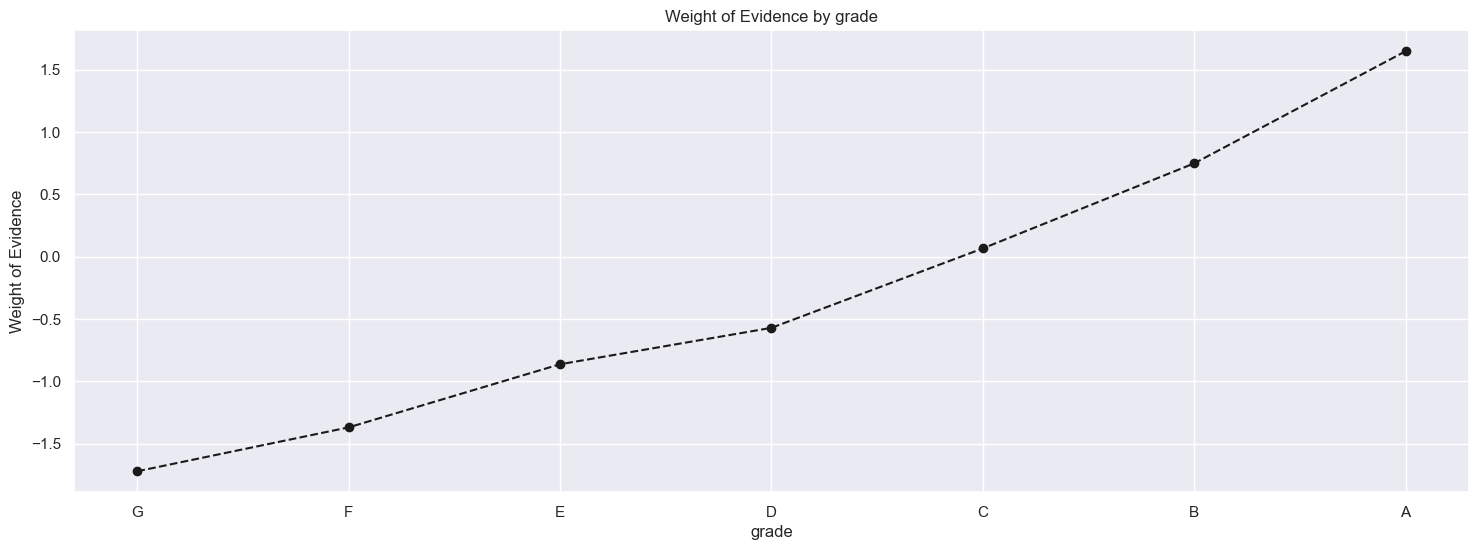

In [175]:
plot_by_woe(df_temp);

In [179]:
df_temp= woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr);
df_temp;

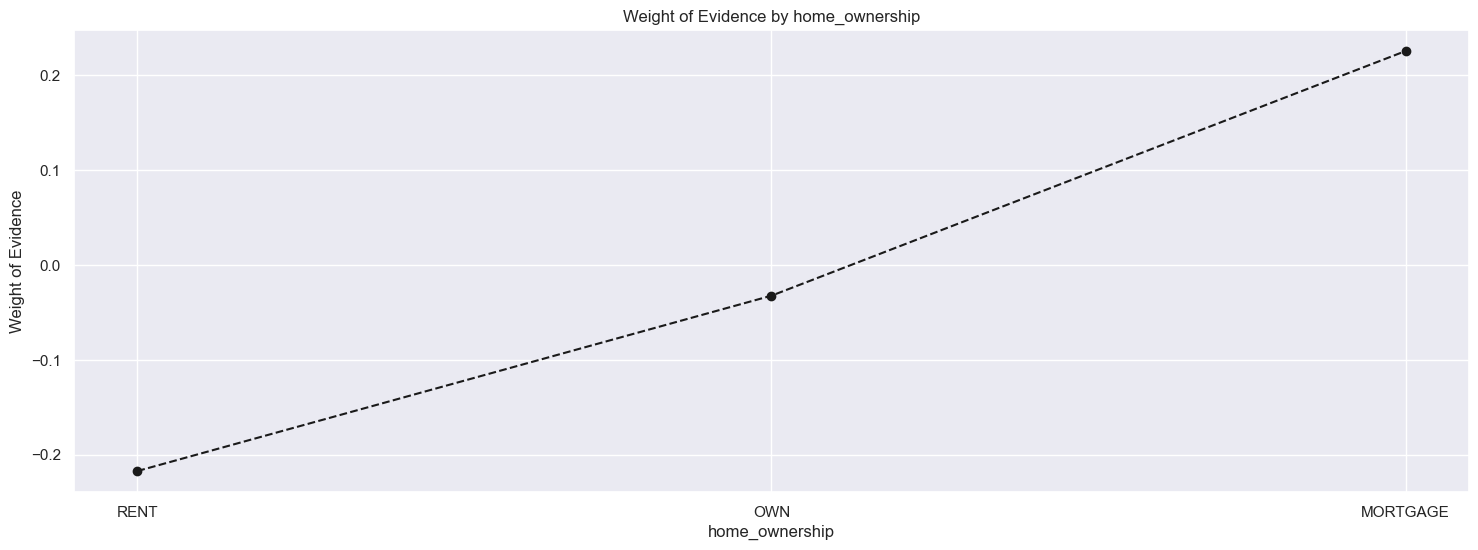

In [181]:
plot_by_woe(df_temp);

In [183]:
df_inputs_prepr['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY'], dtype=object)

In [185]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY']= sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:ANY']]);

In [187]:
df_inputs_prepr['addr_state'].unique();

In [189]:
df_temp= woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr);
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NV,5924,0.969953,0.014068,5746.0,178.0,0.013905,0.022672,-0.488919,NaN,NaN,inf
1,SD,835,0.970060,0.001983,810.0,25.0,0.001960,0.003184,-0.485236,0.000107,0.003683,inf
2,HI,2083,0.973596,0.004947,2028.0,55.0,0.004908,0.007005,-0.355923,0.003536,0.129314,inf
3,OK,3968,0.976310,0.009423,3874.0,94.0,0.009375,0.011973,-0.244647,0.002715,0.111276,inf
4,AK,954,0.977987,0.002266,933.0,21.0,0.002258,0.002675,-0.169512,0.001677,0.075135,inf
5,NY,33844,0.978253,0.080372,33108.0,736.0,0.080118,0.093746,-0.157095,0.000266,0.012417,inf
6,AL,5347,0.978306,0.012698,5231.0,116.0,0.012658,0.014775,-0.154627,0.000052,0.002467,inf
7,UT,2836,0.978491,0.006735,2775.0,61.0,0.006715,0.007770,-0.145863,0.000185,0.008765,inf
8,WY,900,0.978889,0.002137,881.0,19.0,0.002132,0.002420,-0.126776,0.000398,0.019086,inf
9,FL,29298,0.979111,0.069576,28686.0,612.0,0.069417,0.077952,-0.115963,0.000222,0.010814,inf


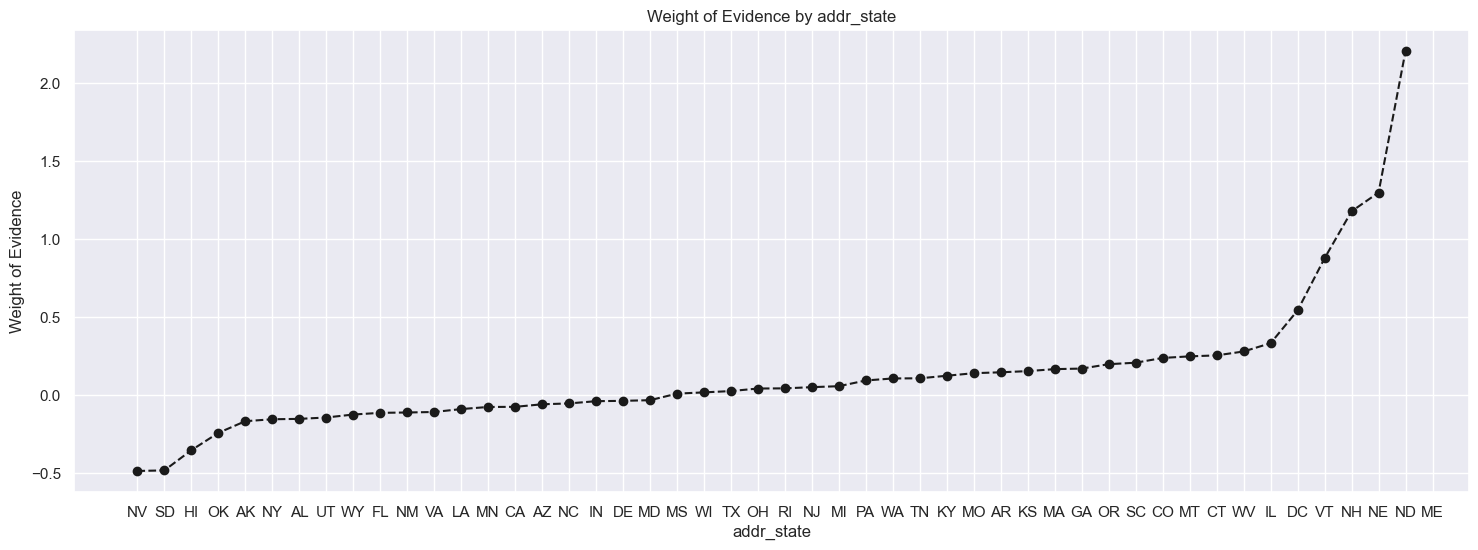

In [191]:
plot_by_woe(df_temp);

In [192]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

In [193]:
if ['addr_state:ID'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ID'] = 0

In [197]:
if ['addr_state:IA'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:IA'] = 0

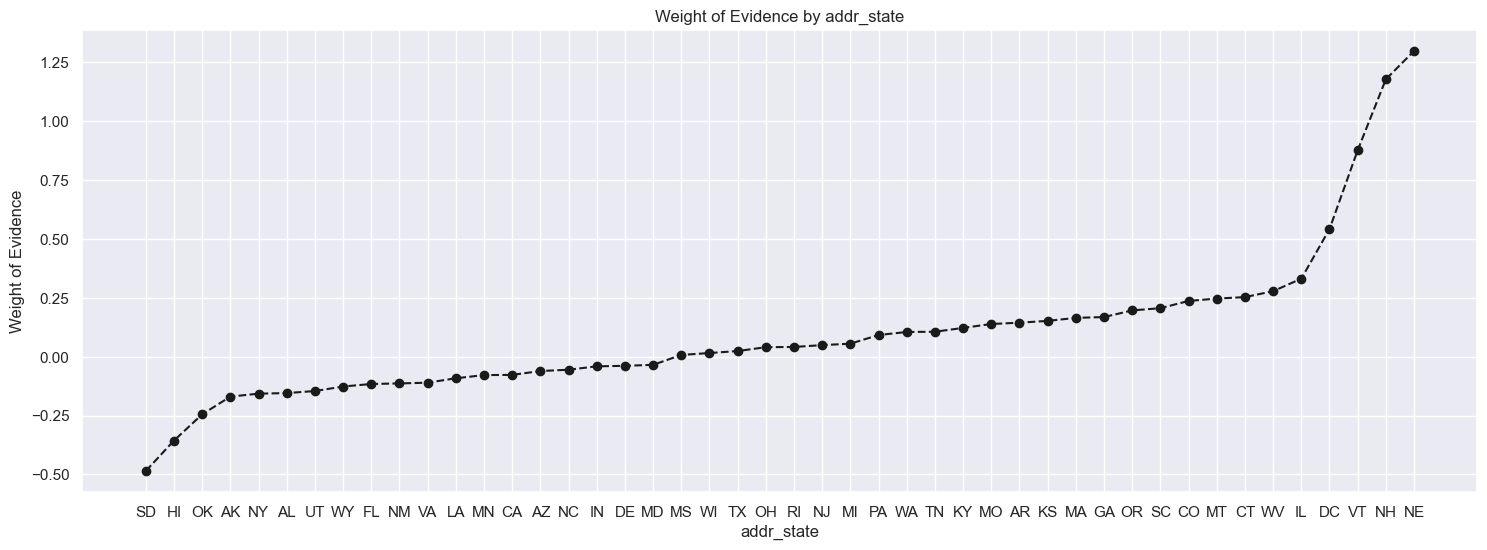

In [199]:
plot_by_woe(df_temp.iloc[1: -2, : ]);
# We plot the weight of evidence values.

In [201]:
# We create the following categories:
# 'ND' 'NE' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA' 'OK' 'TN'
# 'NY'
# 'LA' 'NC'
# 'CA'
# 'MO' 'MD' 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR' 'WI'
# 'TX'
# 'IL' 'CT' 'MT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID' 'IA'

# ND_NE_NV_FL_HI_AL will be the reference category

In [203]:
df_inputs_prepr['addr_state:ND_NE_NV_FL_HI_AL']= sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                                            df_inputs_prepr['addr_state:NV'], df_inputs_prepr['addr_state:FL'],
                                                     df_inputs_prepr['addr_state:HI'], df_inputs_prepr['addr_state:AL']]);

df_inputs_prepr['addr_state:NM_VA_OK_TN'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA'],
                                                df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN']]);

df_inputs_prepr['addr_state:LA_NC'] = sum([df_inputs_prepr['addr_state:LA'], df_inputs_prepr['addr_state:NC']]);

df_inputs_prepr['addr_state:MO_MD_UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:MD'],
                                              df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']]);

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']]);

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']]);

df_inputs_prepr['addr_state:GA_WA_OR_WI'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR'], df_inputs_prepr['addr_state:WI']]);


df_inputs_prepr['addr_state:IL_CT_MT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT'],
                                             df_inputs_prepr['addr_state:MT']]);

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']]);

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID_IA'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID'],
                                                         df_inputs_prepr['addr_state:IA']])

In [205]:
df_temp= woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr);
df_temp;

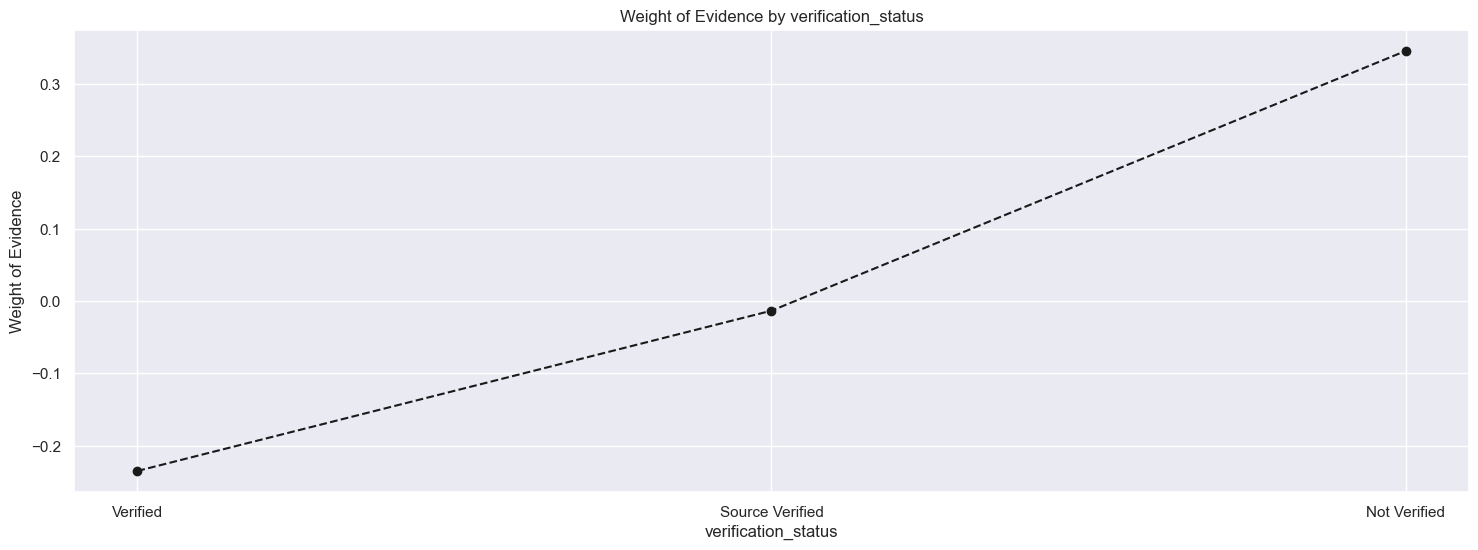

In [207]:
plot_by_woe(df_temp);

In [208]:
df_temp= woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr);
df_temp;

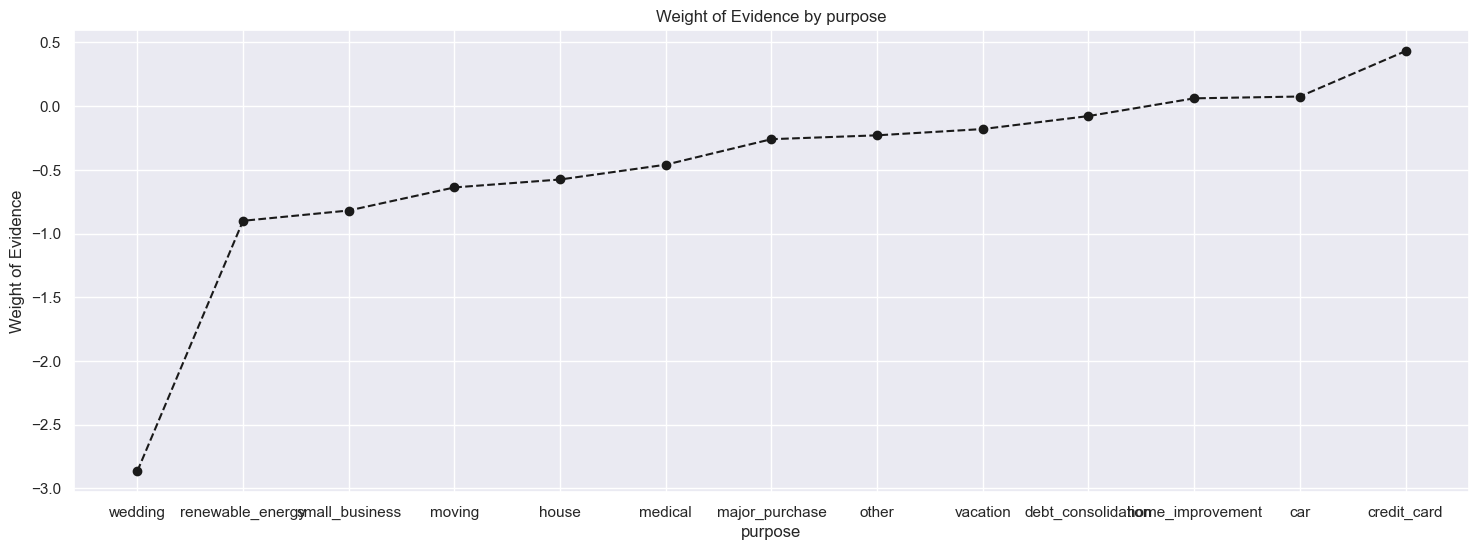

In [211]:
plot_by_woe(df_temp);

In [212]:
# We combine 'small_business', 'moving', 'house' in one category: 'sm_b___mov__house'.
# We combine 'educational', 'medical', 'renewable_energy', 'other' in one category: oth__educ_ren_en__med'
# We combine 'wedding', 'vacation' in one category: ' wedd__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'sm_b___mov__house' will be the reference category.

In [215]:
df_inputs_prepr['purpose:sm_b___mov__house'] = sum([df_inputs_prepr['purpose:small_business'], df_inputs_prepr['purpose:moving'],
                                                    df_inputs_prepr['purpose:house']]);

df_inputs_prepr['purpose:oth__educ_ren_en__med'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:other'],
                                                        df_inputs_prepr['purpose:medical'], df_inputs_prepr['purpose:renewable_energy']]);

                                                    
df_inputs_prepr['purpose:wedd__vacation'] = sum([df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:vacation']]);


df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']]);

In [217]:
df_temp= woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr);
df_temp;

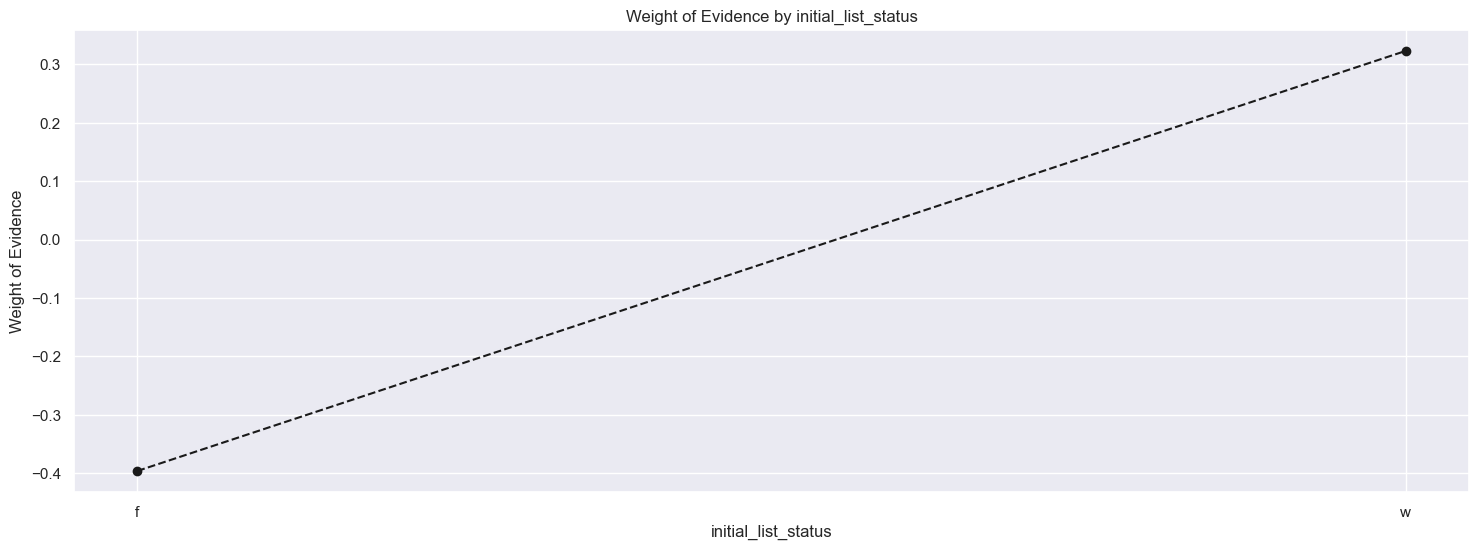

In [219]:
plot_by_woe(df_temp);

In [221]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(), 
                df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns= [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs']= df['n_obs']/ df['n_obs'].sum()
    df['n_good']= df['prop_good'] * df['n_obs']
    df['n_bad']= (1- df['prop_good']) * df['n_obs']
    df['prop_n_good']= df['n_good']/df['n_good'].sum()
    df['prop_n_bad']= df['n_bad']/ df['n_bad'].sum()
    df['WoE']= np.log(df['prop_n_good']/df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good']= df['prop_good'].diff().abs()
    df['diff_prop_good']= df['prop_good'].diff().abs()
    df['diff_WoE']= df['WoE'].diff().abs()
    df['IV']= (df['prop_n_good']- df['prop_n_bad']) * df['WoE']
    df['IV']= df['IV'].sum()
    return df

In [223]:
df_inputs_prepr['term_int'].unique();

In [225]:
df_temp=woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr);
df_temp;
# 60 months category will be our refernce category

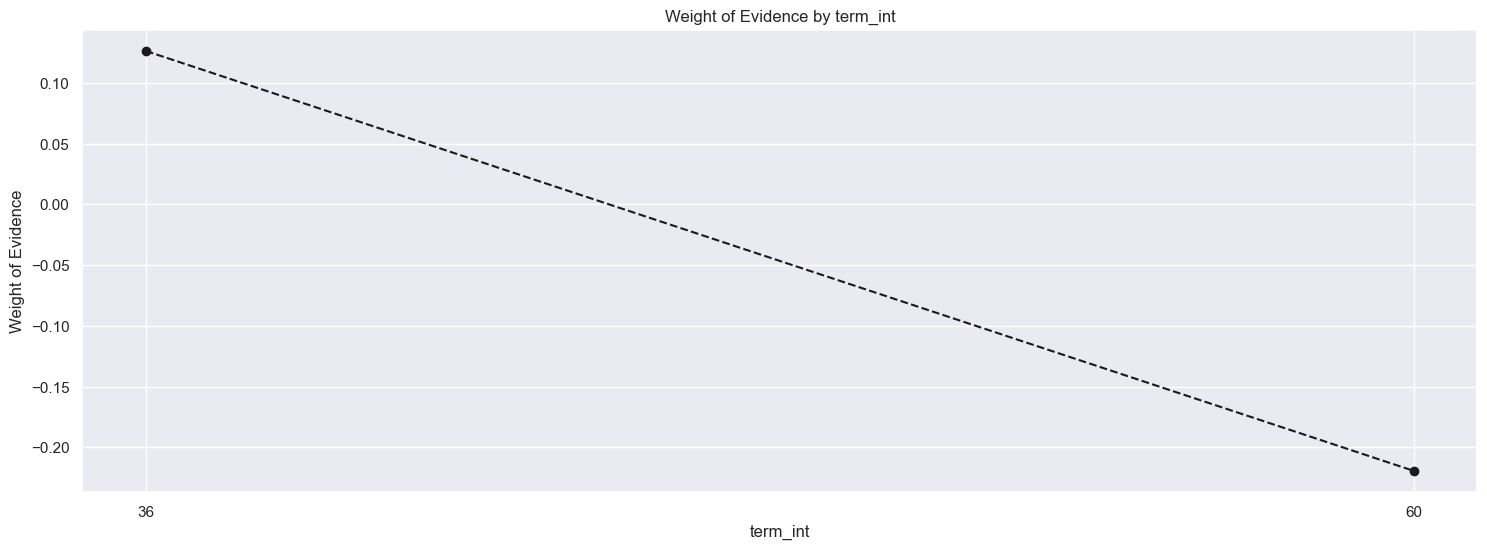

In [227]:
plot_by_woe(df_temp);

In [229]:
df_inputs_prepr['term:36']= np.where((df_inputs_prepr['term_int'])==36, 1, 0);
df_inputs_prepr['term:60']= np.where((df_inputs_prepr['term_int'])==60, 1, 0);

In [231]:
df_inputs_prepr['emp_length_int'].unique();

In [233]:
df_temp=woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr);
df_temp;

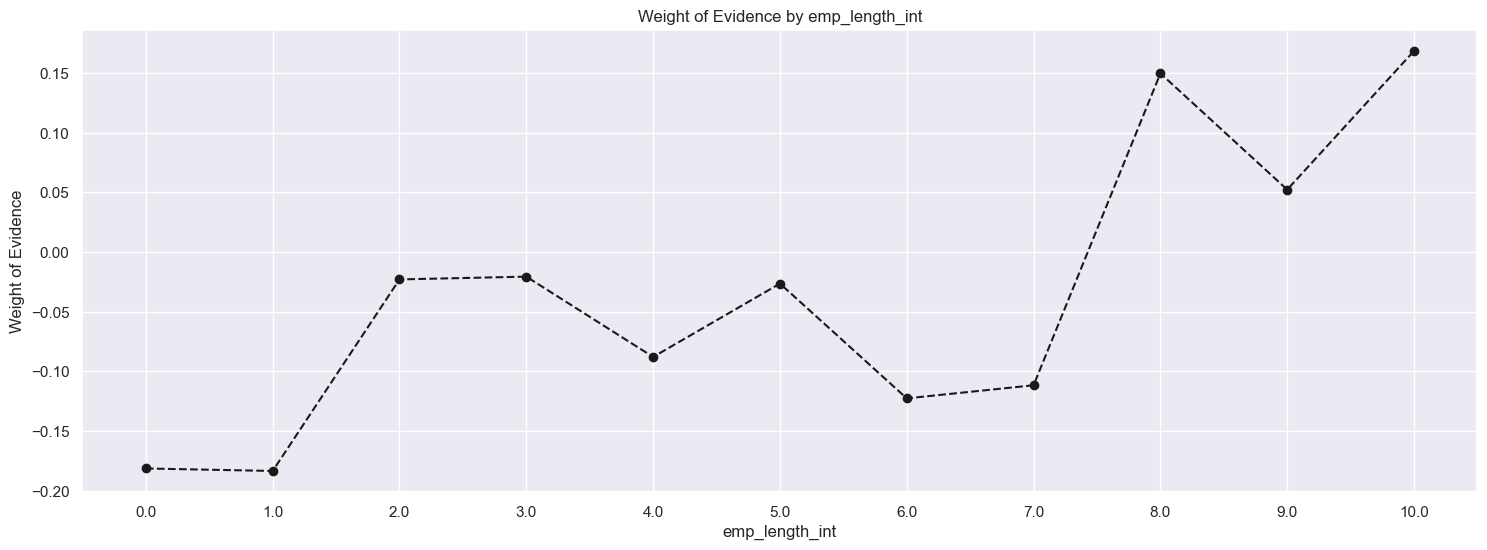

In [235]:
plot_by_woe(df_temp);
#The borowwers with 0 length of employment will be our reference category (lowest WoE)

In [236]:
df_inputs_prepr['emp_length_int:0']= np.where((df_inputs_prepr['emp_length_int']).isin([0]),1 , 0);
df_inputs_prepr['emp_length_int:1']= np.where((df_inputs_prepr['emp_length_int']).isin([1]),1 , 0);
df_inputs_prepr['emp_length_int:2-4']= np.where((df_inputs_prepr['emp_length_int']).isin(range(2, 5)),1 , 0);
df_inputs_prepr['emp_length_int:2-4']= np.where((df_inputs_prepr['emp_length_int']).isin(range(2, 5)),1 , 0);
df_inputs_prepr['emp_length_int:5-6']= np.where((df_inputs_prepr['emp_length_int']).isin(range(5, 7)),1 , 0);
df_inputs_prepr['emp_length_int:7-9']= np.where((df_inputs_prepr['emp_length_int']).isin(range(7, 10)),1 , 0);
df_inputs_prepr['emp_length_int:10']= np.where((df_inputs_prepr['emp_length_int']).isin([10]),1 , 0);

In [238]:
df_inputs_prepr['mths_since_issue_d'].unique();

In [241]:
df_inputs_prepr['mths_since_issue_d_factor']=pd.cut(df_inputs_prepr['mths_since_issue_d'], 50);
df_inputs_prepr['mths_since_issue_d_factor'];

In [243]:
df_temp=woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr);
df_temp;

C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)


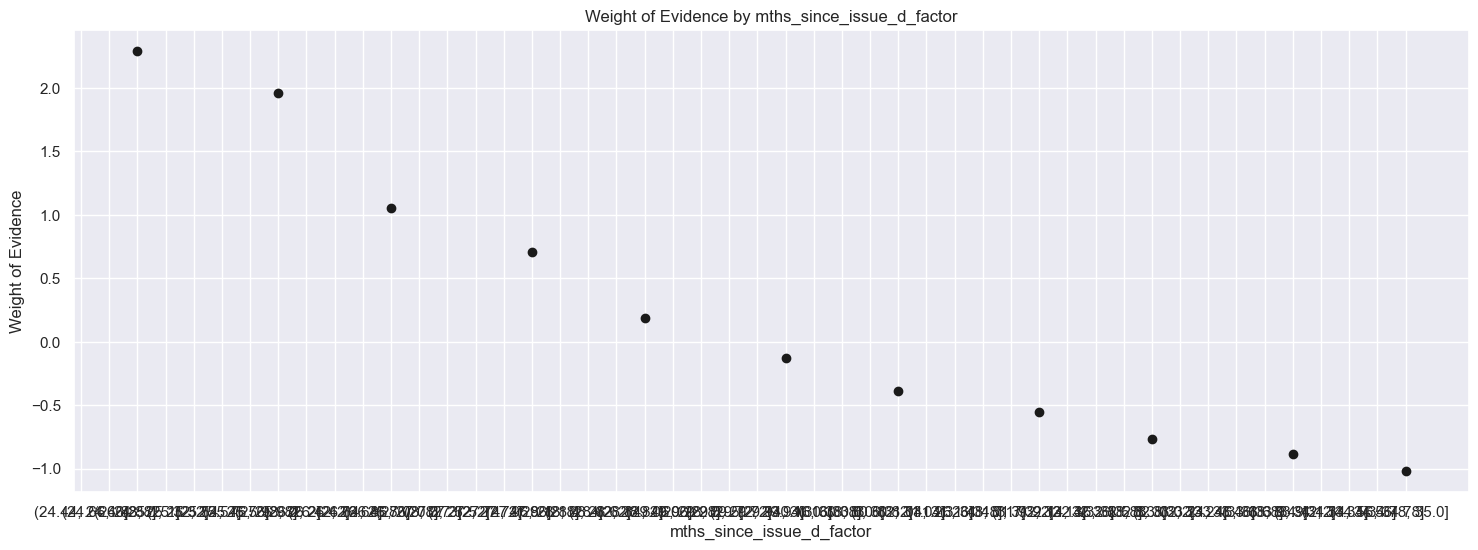

In [245]:
plot_by_woe(df_temp);

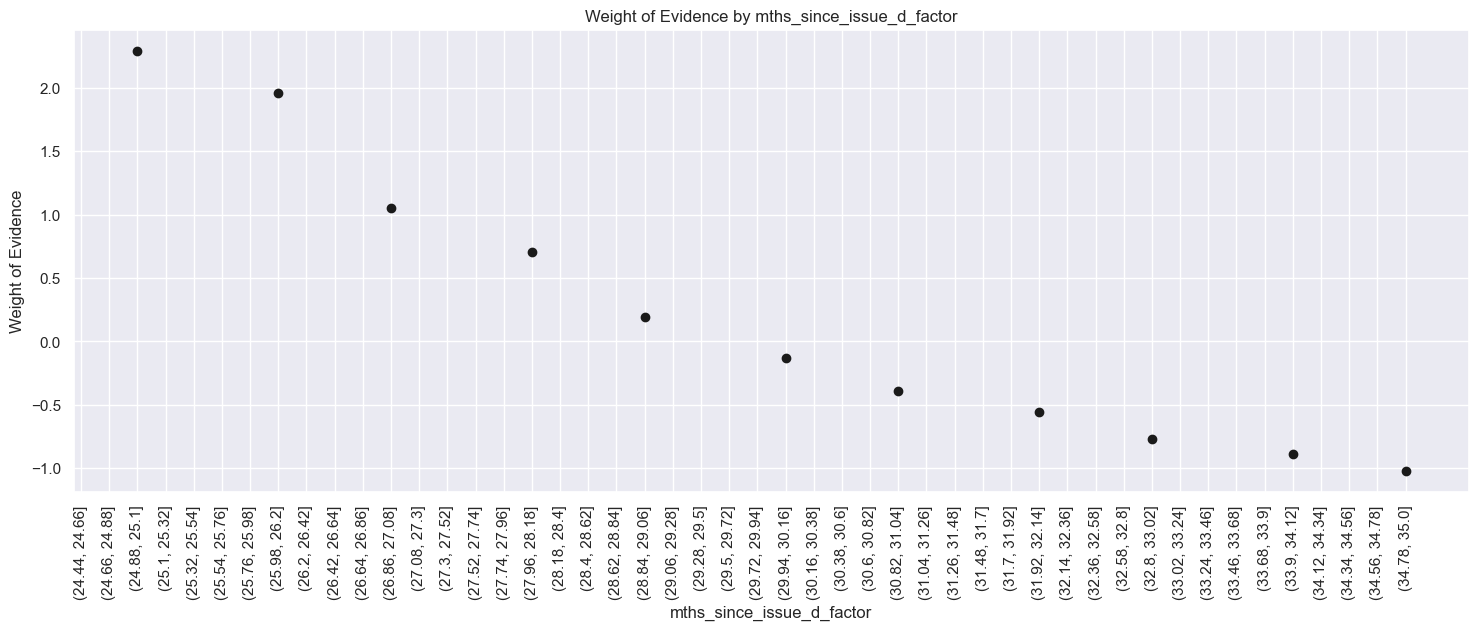

In [246]:
plot_by_woe(df_temp, 90);

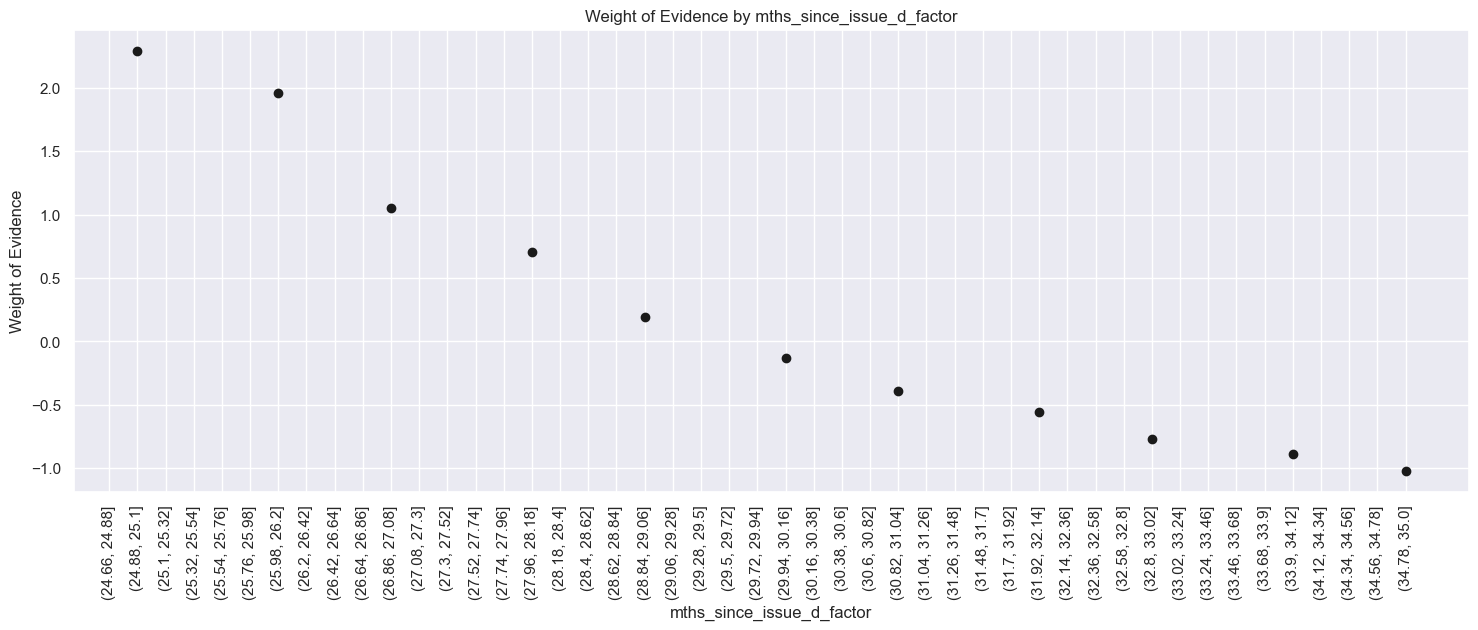

In [247]:
plot_by_woe(df_temp.iloc[3: , :], 90);

In [249]:
df_inputs_prepr['mths_since_issue_d:<38']= np.where((df_inputs_prepr['mths_since_issue_d_factor']).isin(range(38)),1 , 0);
df_inputs_prepr['mths_since_issue_d: 38-39']= np.where((df_inputs_prepr['mths_since_issue_d_factor']).isin(range(38, 40)),1 , 0);
df_inputs_prepr['mths_since_issue_d: 40-41']= np.where((df_inputs_prepr['mths_since_issue_d_factor']).isin(range(40, 42)),1 , 0);
df_inputs_prepr['mths_since_issue_d: 42-48']= np.where((df_inputs_prepr['mths_since_issue_d_factor']).isin(range(42, 49)),1 , 0);
df_inputs_prepr['mths_since_issue_d: 49-52']= np.where((df_inputs_prepr['mths_since_issue_d_factor']).isin(range(49, 53)),1 , 0);
df_inputs_prepr['mths_since_issue_d: 53-64']= np.where((df_inputs_prepr['mths_since_issue_d_factor']).isin(range(53, 65)),1 , 0);
df_inputs_prepr['mths_since_issue_d: 65-86']= np.where((df_inputs_prepr['mths_since_issue_d_factor']).isin(range(65, 87)),1 , 0);
df_inputs_prepr['mths_since_issue_d:>86'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(87, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

In [250]:
df_inputs_prepr['int_rate_factor']=pd.cut(df_inputs_prepr['int_rate'], 50);
df_inputs_prepr['int_rate_factor'];

C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)


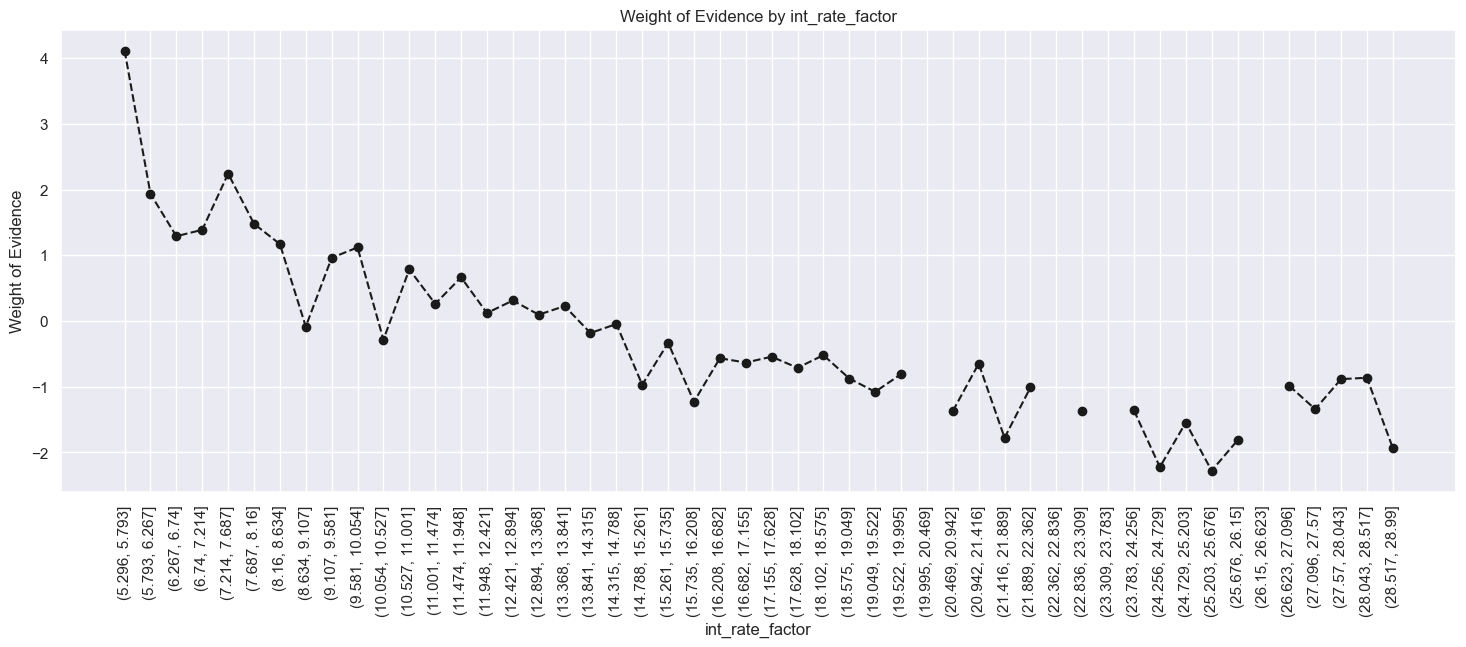

In [251]:
df_temp=woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr);
plot_by_woe(df_temp, 90);

In [253]:
df_inputs_prepr['int_rate: <9.548']= np.where((df_inputs_prepr['int_rate']<= 9.548) ,1 , 0);
df_inputs_prepr['int_rate: 9.548- 12.025']= np.where((df_inputs_prepr['int_rate']> 9.548) & (df_inputs_prepr['int_rate'] <= 12.025) ,1 , 0);
df_inputs_prepr['int_rate: 12.025- 15.74']= np.where((df_inputs_prepr['int_rate']> 12.025) & (df_inputs_prepr['int_rate'] <= 15.74) ,1 , 0);
df_inputs_prepr['int_rate: 15.74- 20.281']= np.where((df_inputs_prepr['int_rate']> 15.74) & (df_inputs_prepr['int_rate'] <= 20.281) ,1 , 0);
df_inputs_prepr['int_rate: > 20.281']= np.where((df_inputs_prepr['int_rate']> 20.281) ,1 , 0);

C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)


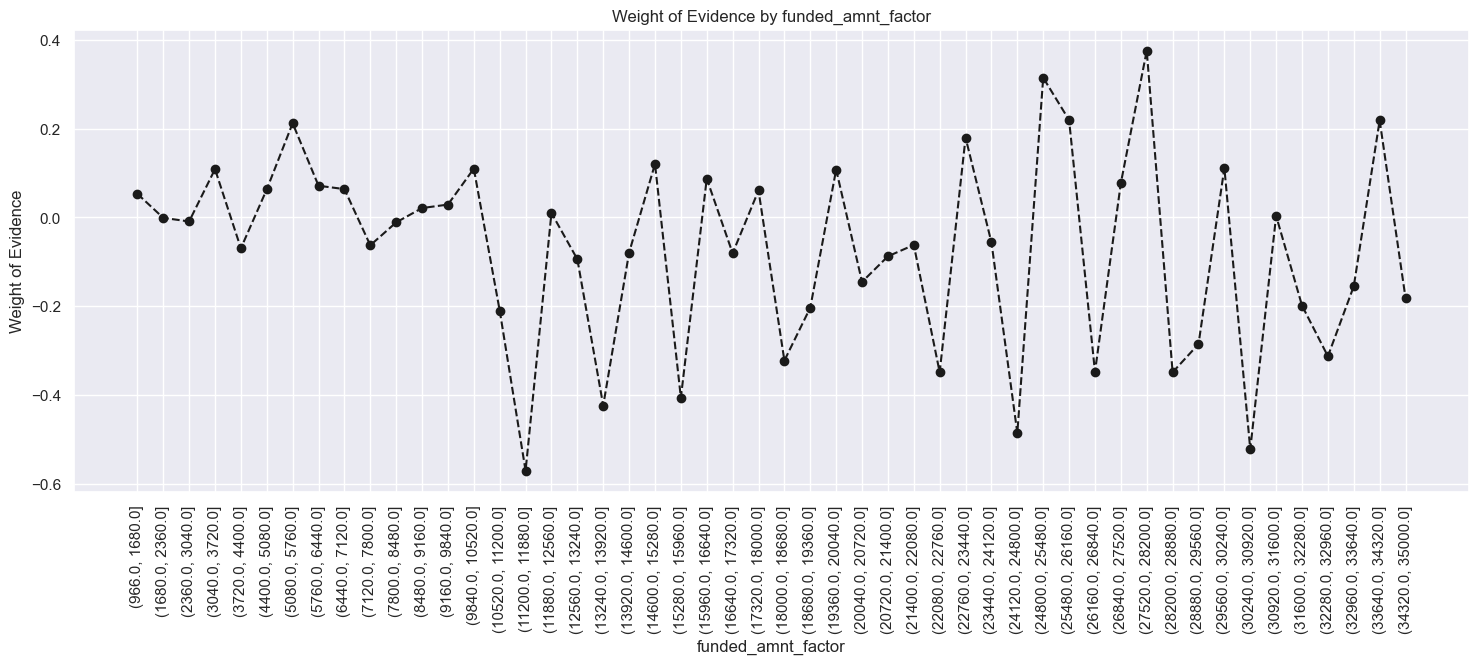

In [254]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50);
df_temp=woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr);
plot_by_woe(df_temp, 90);
#There is no other clear pattern of dependence between the independent variable and weight of evidence.
#In other words, weight of evidence varies greatly, and there seems to be no association whatsoever with the independent variable.
#This is sufficient reason to make the decision not to use the funded amount variable in our PD model.

C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)


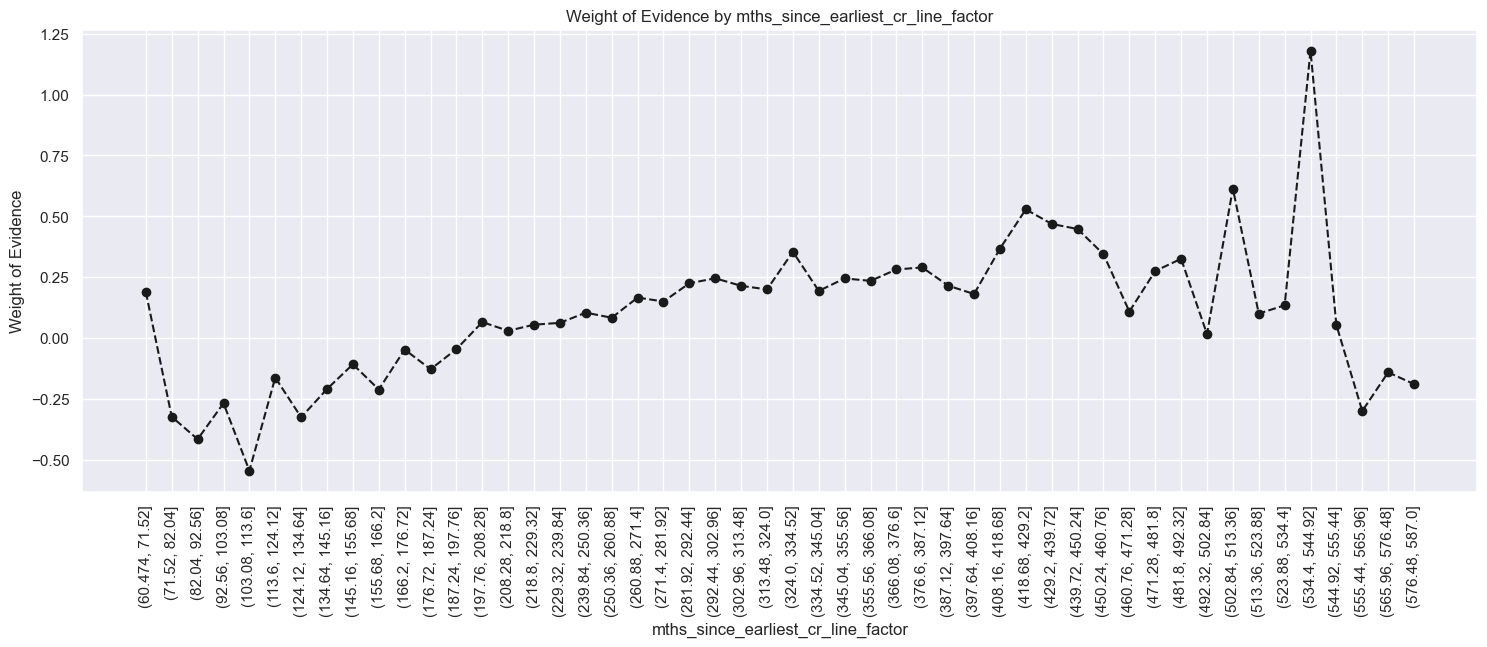

In [261]:
df_inputs_prepr['mths_since_earliest_cr_line_factor']=pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50);
df_temp=woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr);
plot_by_woe(df_temp, 90);

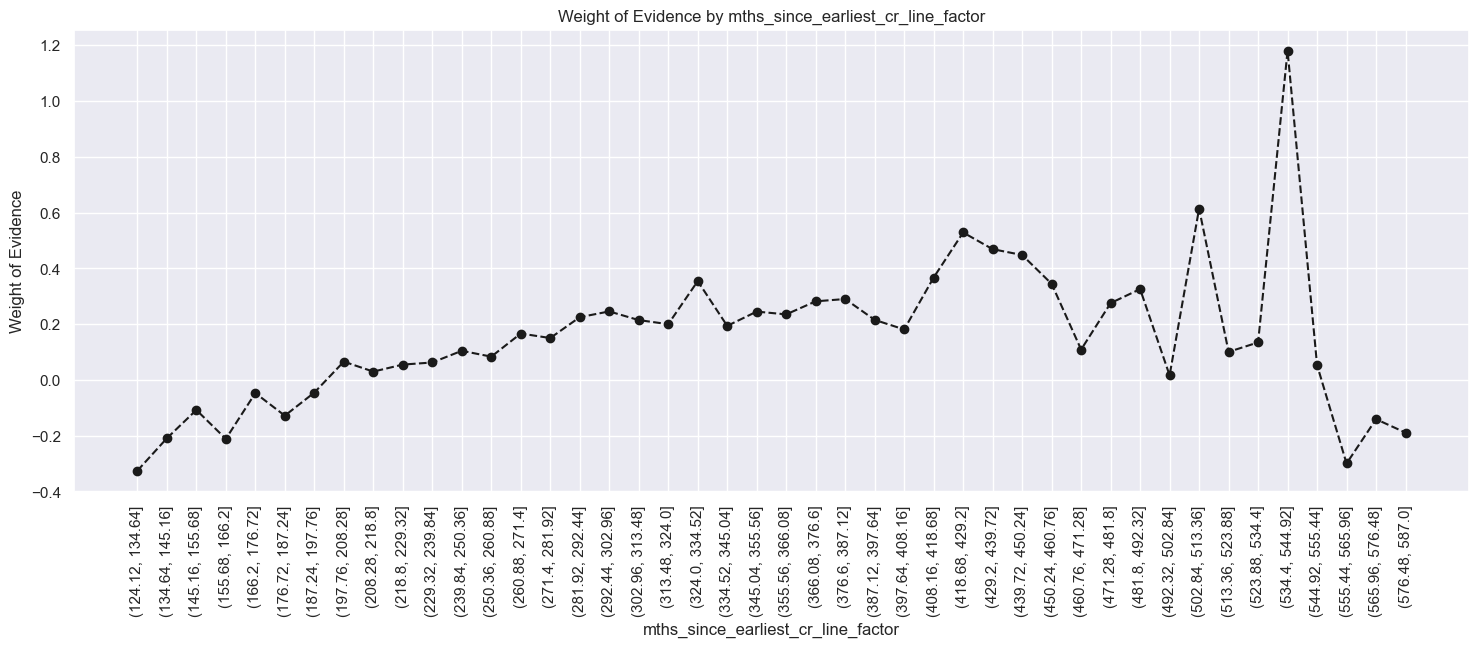

In [263]:
plot_by_woe(df_temp.iloc[6: , : ], 90)

In [264]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352

df_inputs_prepr['mths_since_earliest_cr_line: < 140']= np.where((df_inputs_prepr['mths_since_earliest_cr_line']).isin(range(140)),1 , 0);
df_inputs_prepr['mths_since_earliest_cr_line: 141-164']= np.where((df_inputs_prepr['mths_since_earliest_cr_line']).isin(range(140, 165)),1 , 0);
df_inputs_prepr['mths_since_earliest_cr_line: 165-247']= np.where((df_inputs_prepr['mths_since_earliest_cr_line']).isin(range(165, 248)),1 , 0);
df_inputs_prepr['mths_since_earliest_cr_line: 248-270']= np.where((df_inputs_prepr['mths_since_earliest_cr_line']).isin(range(248, 271)),1 , 0);
df_inputs_prepr['mths_since_earliest_cr_line: 271-352']= np.where((df_inputs_prepr['mths_since_earliest_cr_line']).isin(range(271, 353)),1 , 0);
df_inputs_prepr['mths_since_earliest_cr_line: > 352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)


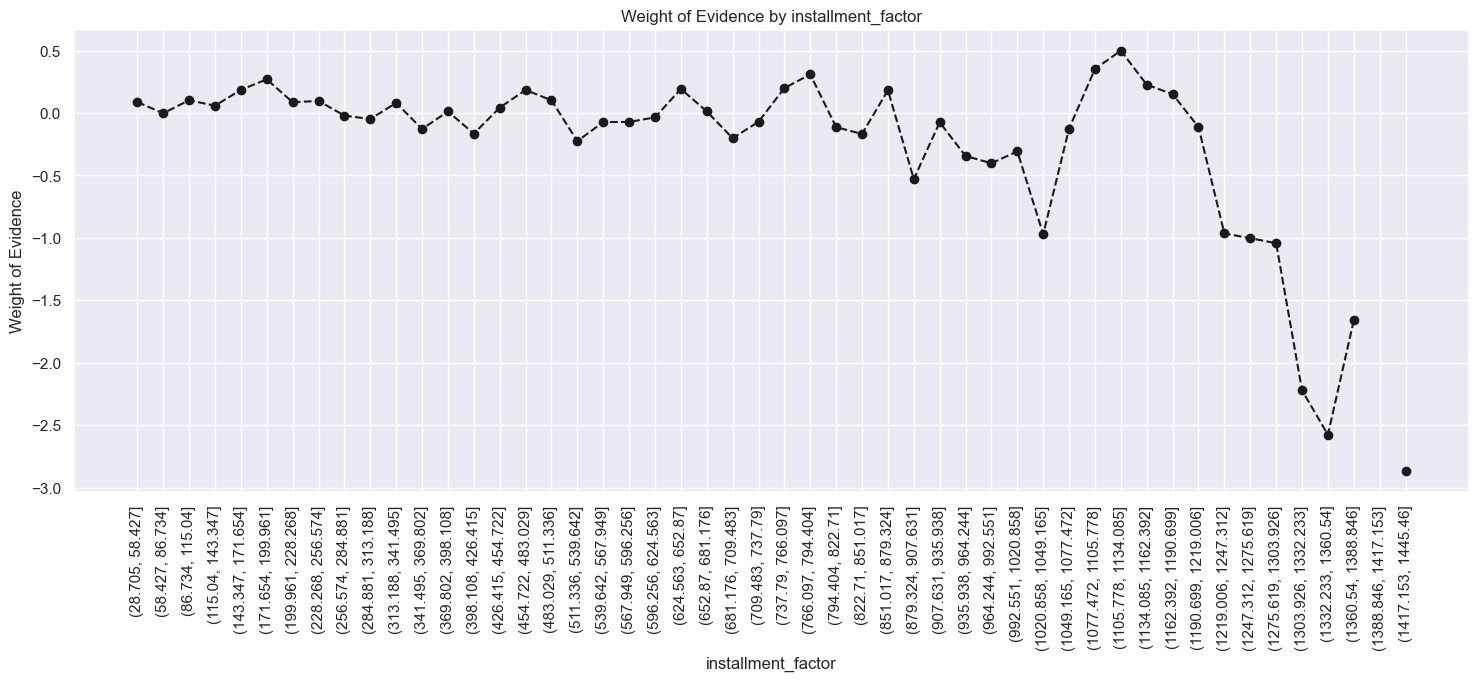

In [265]:
df_inputs_prepr['installment_factor']=pd.cut(df_inputs_prepr['installment'], 50);
df_temp=woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr);
plot_by_woe(df_temp, 90);

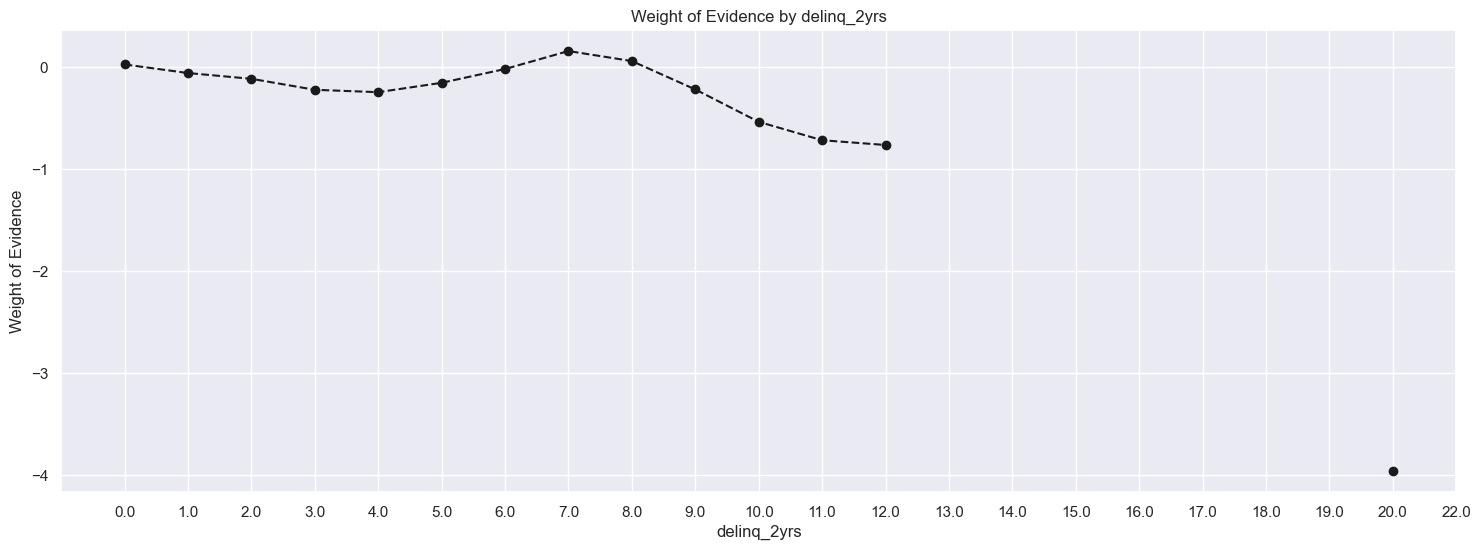

In [267]:
df_temp=woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr);
plot_by_woe(df_temp);

In [269]:
df_inputs_prepr['delinq_2yrs: =0']= np.where((df_inputs_prepr['delinq_2yrs']== 0) ,1 , 0);
df_inputs_prepr['delinq_2yrs: 1-3']= np.where((df_inputs_prepr['delinq_2yrs']>= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3) ,1 , 0);
df_inputs_prepr['delinq_2yrs: >= 4']= np.where((df_inputs_prepr['delinq_2yrs']>= 4) ,1 , 0);

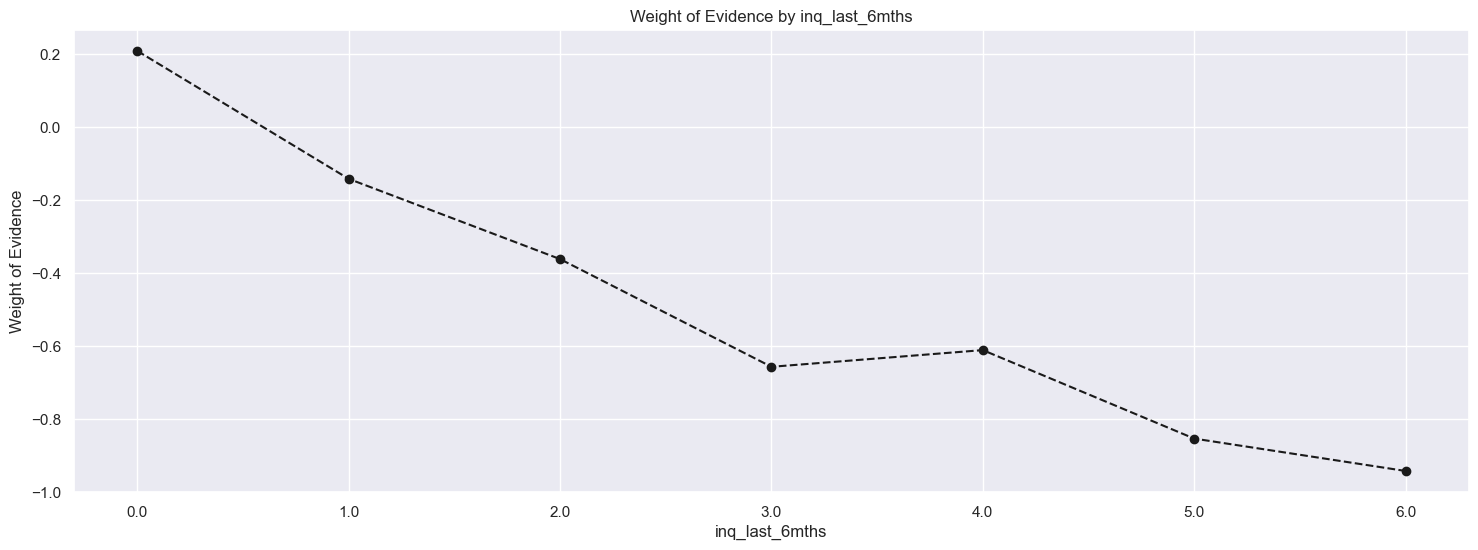

In [270]:
df_temp=woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr);
plot_by_woe(df_temp);

In [272]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths: =0']= np.where((df_inputs_prepr['inq_last_6mths']== 0) ,1 , 0);
df_inputs_prepr['inq_last_6mths: 1-2']= np.where((df_inputs_prepr['inq_last_6mths']>= 1) & (df_inputs_prepr['delinq_2yrs'] <= 2) ,1 , 0);
df_inputs_prepr['inq_last_6mths: 3-6']= np.where((df_inputs_prepr['inq_last_6mths']>= 3) & (df_inputs_prepr['delinq_2yrs'] <= 6) ,1 , 0);
df_inputs_prepr['inq_last_6mths: > 6']= np.where((df_inputs_prepr['inq_last_6mths']> 6) ,1 , 0);

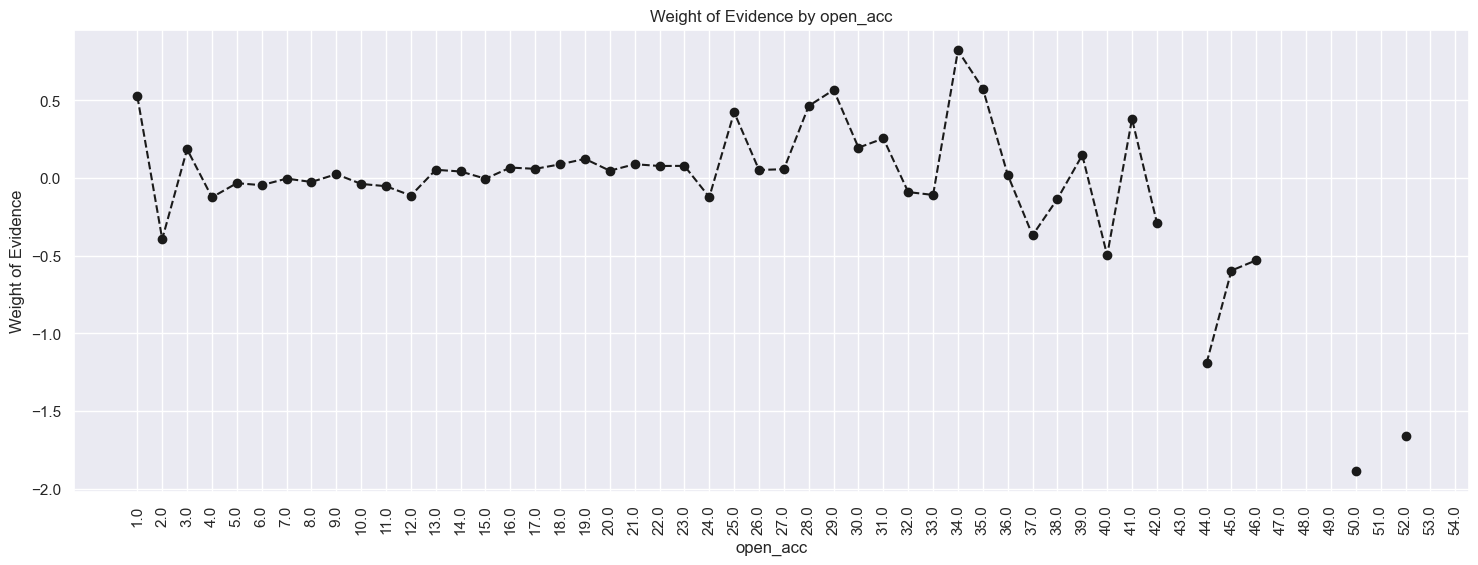

In [275]:
df_temp=woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr);
plot_by_woe(df_temp, 90);

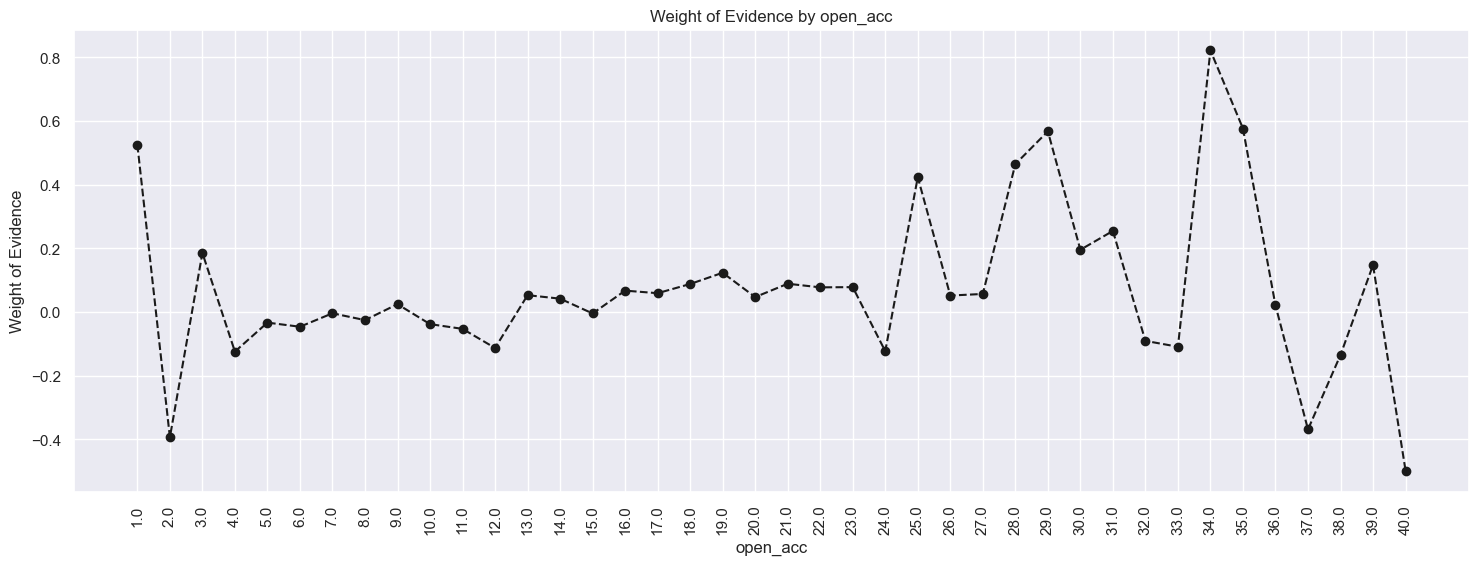

In [278]:
plot_by_woe(df_temp.iloc[ : 40, :], 90);


In [279]:
# Categories: '0', '1', '2-3', '4-12', '13-17', '18-23', '24-25', '26-29', '>= 30'
df_inputs_prepr['open_acc: =0']= np.where((df_inputs_prepr['open_acc']== 0) ,1 , 0);
df_inputs_prepr['open_acc: =1']= np.where((df_inputs_prepr['open_acc']== 1) ,1 , 0);
df_inputs_prepr['open_acc: 2-3']= np.where((df_inputs_prepr['open_acc']>= 2) & (df_inputs_prepr['open_acc'] <= 3) ,1 , 0);
df_inputs_prepr['open_acc: 4-12']= np.where((df_inputs_prepr['open_acc']>= 4) & (df_inputs_prepr['open_acc'] <= 12) ,1 , 0);
df_inputs_prepr['open_acc: 13-17']= np.where((df_inputs_prepr['open_acc']>= 13) & (df_inputs_prepr['open_acc'] <= 17) ,1 , 0);
df_inputs_prepr['open_acc: 18-23']= np.where((df_inputs_prepr['open_acc']>= 18) & (df_inputs_prepr['open_acc'] <= 23) ,1 , 0);
df_inputs_prepr['open_acc: 24-25']= np.where((df_inputs_prepr['open_acc']>= 24) & (df_inputs_prepr['open_acc'] <= 25) ,1 , 0);
df_inputs_prepr['open_acc: 26-29']= np.where((df_inputs_prepr['open_acc']>= 26) & (df_inputs_prepr['open_acc'] <= 29) ,1 , 0);
df_inputs_prepr['open_acc: >= 30']= np.where((df_inputs_prepr['open_acc']>= 30) ,1 , 0);

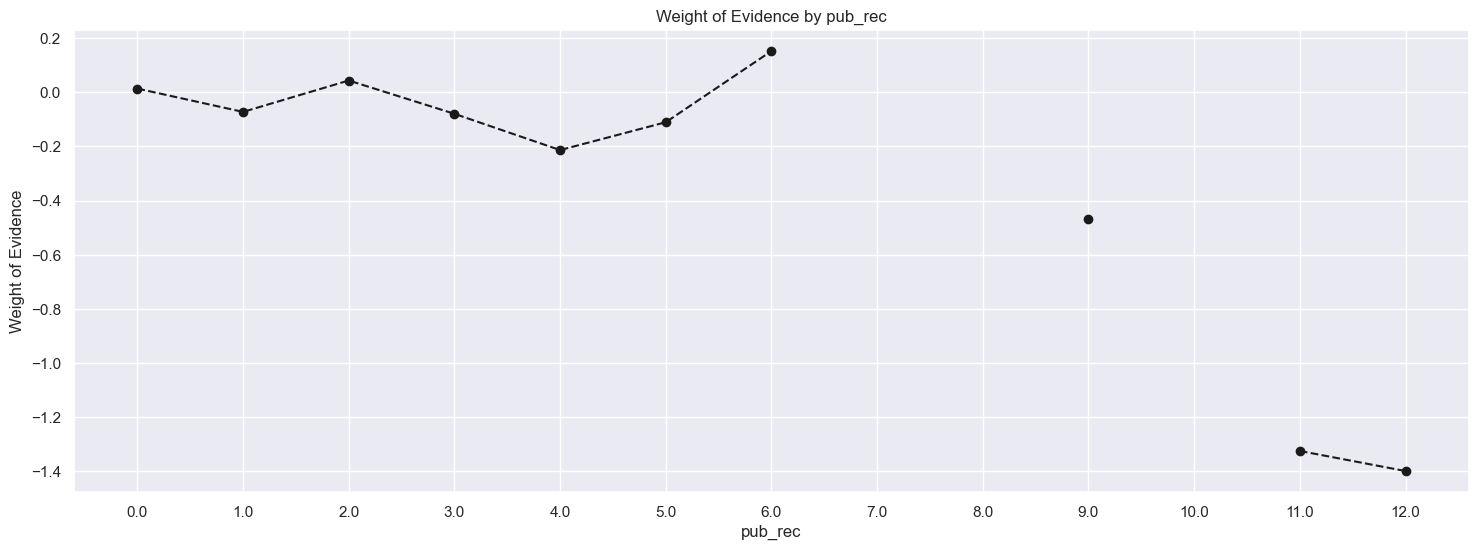

In [280]:
df_temp=woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr);
plot_by_woe(df_temp);

In [281]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec: 0-2']= np.where((df_inputs_prepr['pub_rec']>= 0) & (df_inputs_prepr['pub_rec'] <= 2) ,1 , 0);
df_inputs_prepr['pub_rec: 3-4']= np.where((df_inputs_prepr['pub_rec']>= 3) & (df_inputs_prepr['pub_rec'] <= 4) ,1 , 0);
df_inputs_prepr['pub_rec: >= 5']= np.where((df_inputs_prepr['pub_rec']>= 5) ,1 , 0);

C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)


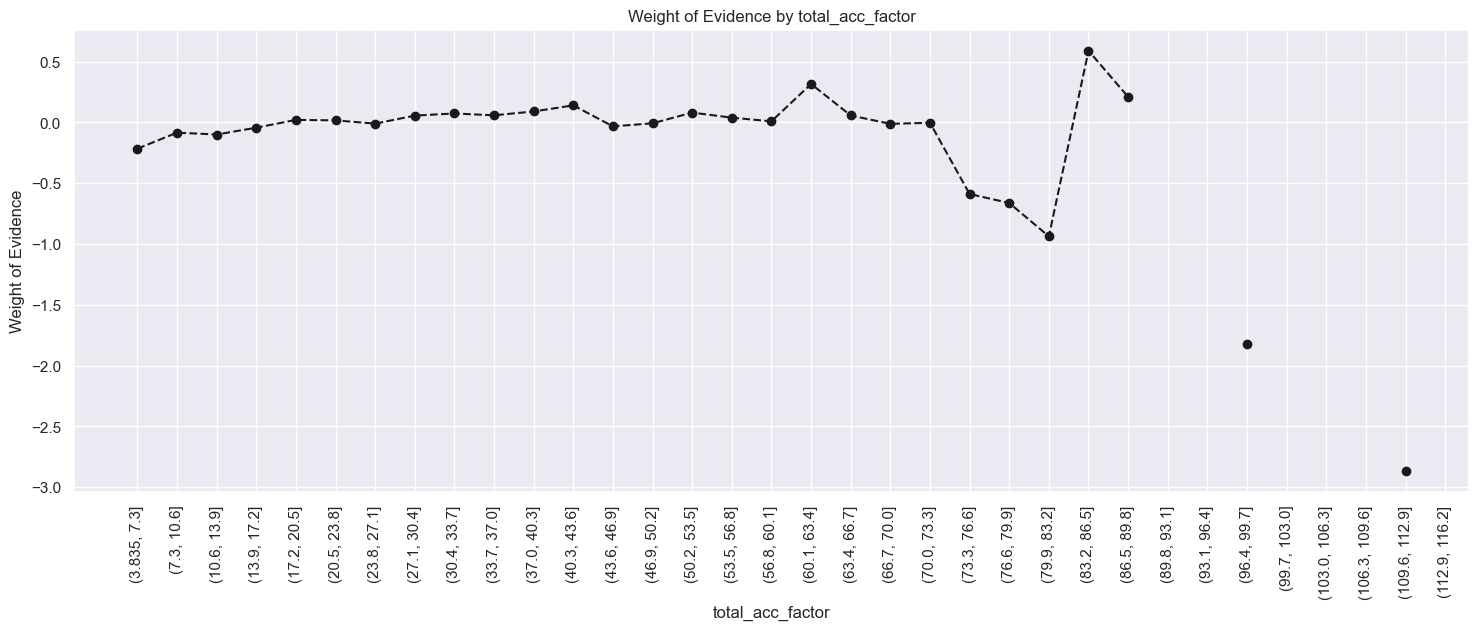

In [283]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
df_temp=woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr);
plot_by_woe(df_temp, 90);

In [284]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc: <= 27']= np.where((df_inputs_prepr['total_acc']<= 27) ,1 , 0);
df_inputs_prepr['total_acc: 28-51']= np.where((df_inputs_prepr['total_acc']>= 28) & (df_inputs_prepr['total_acc'] <= 51) ,1 , 0);
df_inputs_prepr['total_acc: >= 52']= np.where((df_inputs_prepr['total_acc']>= 52) ,1 , 0);

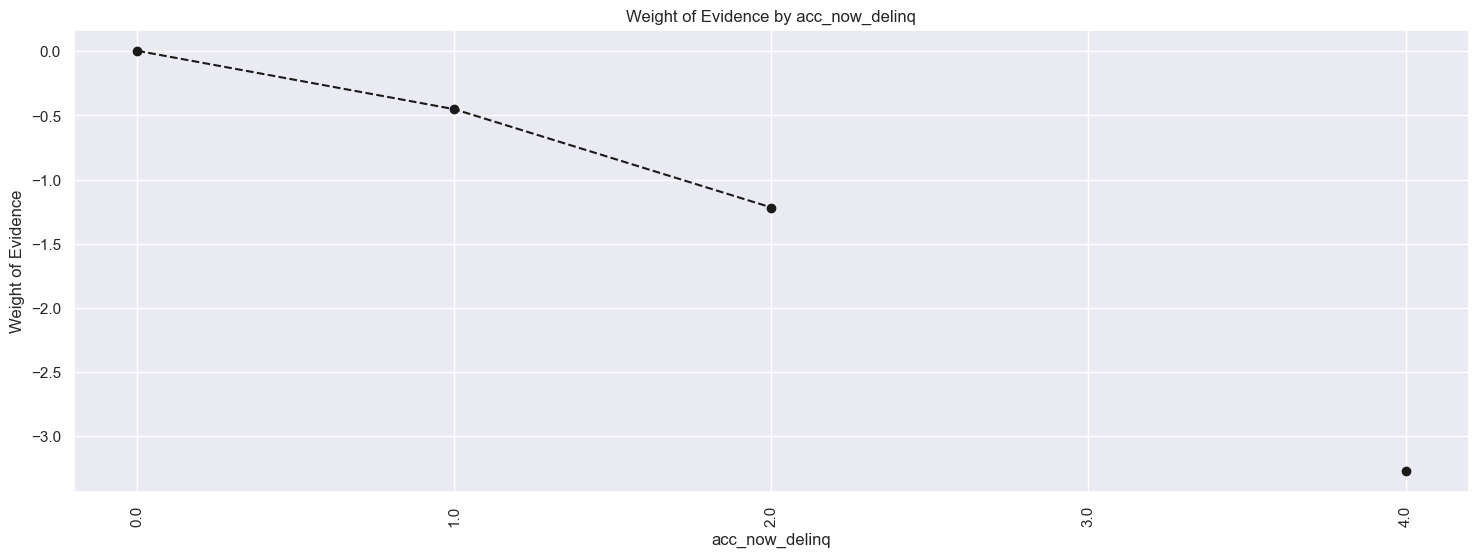

In [285]:
df_temp=woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr);
plot_by_woe(df_temp, 90);

In [288]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0-1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 0) & (df_inputs_prepr['acc_now_delinq'] <= 1), 1, 0)
df_inputs_prepr['acc_now_delinq:>= 2'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 2), 1, 0)

In [289]:
# total_rev_hi_lim
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000);
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr);

C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
C:\Users\fatem\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


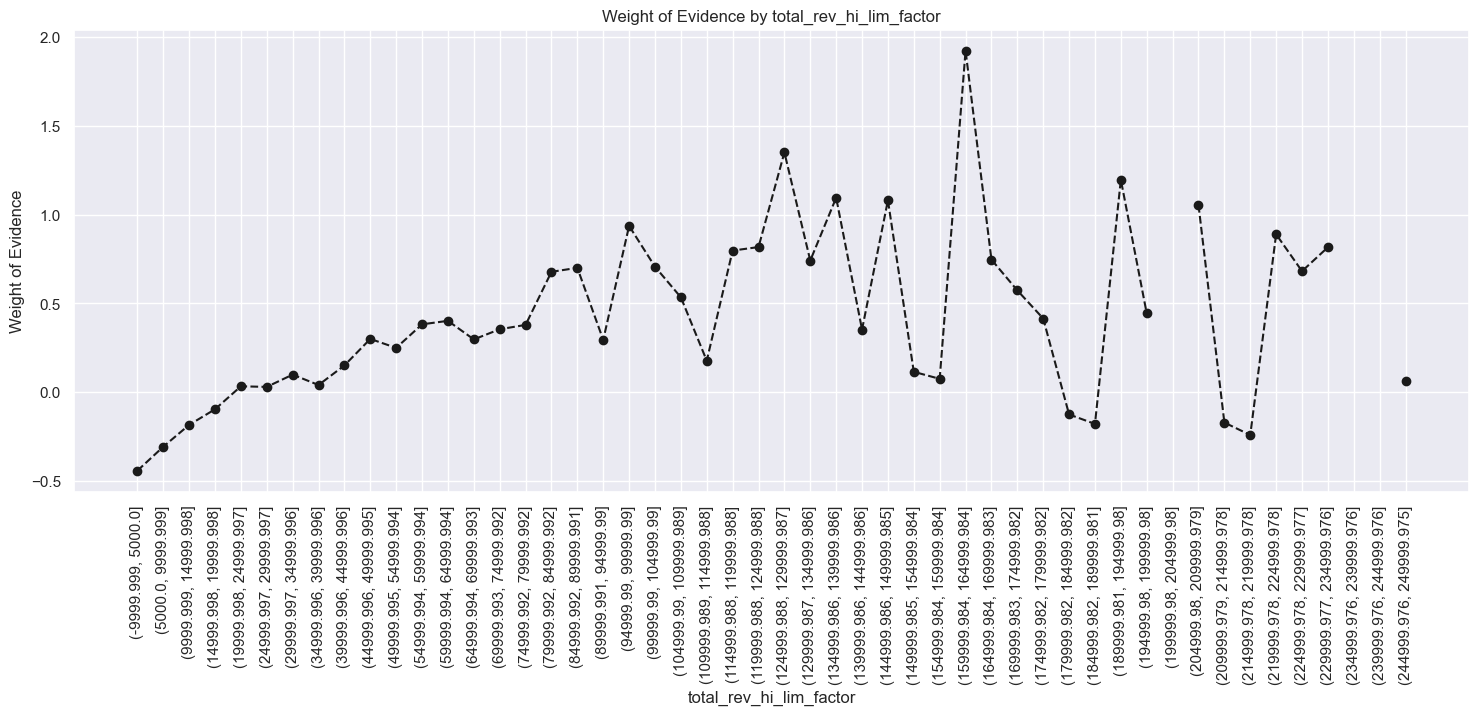

In [292]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)


In [293]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)


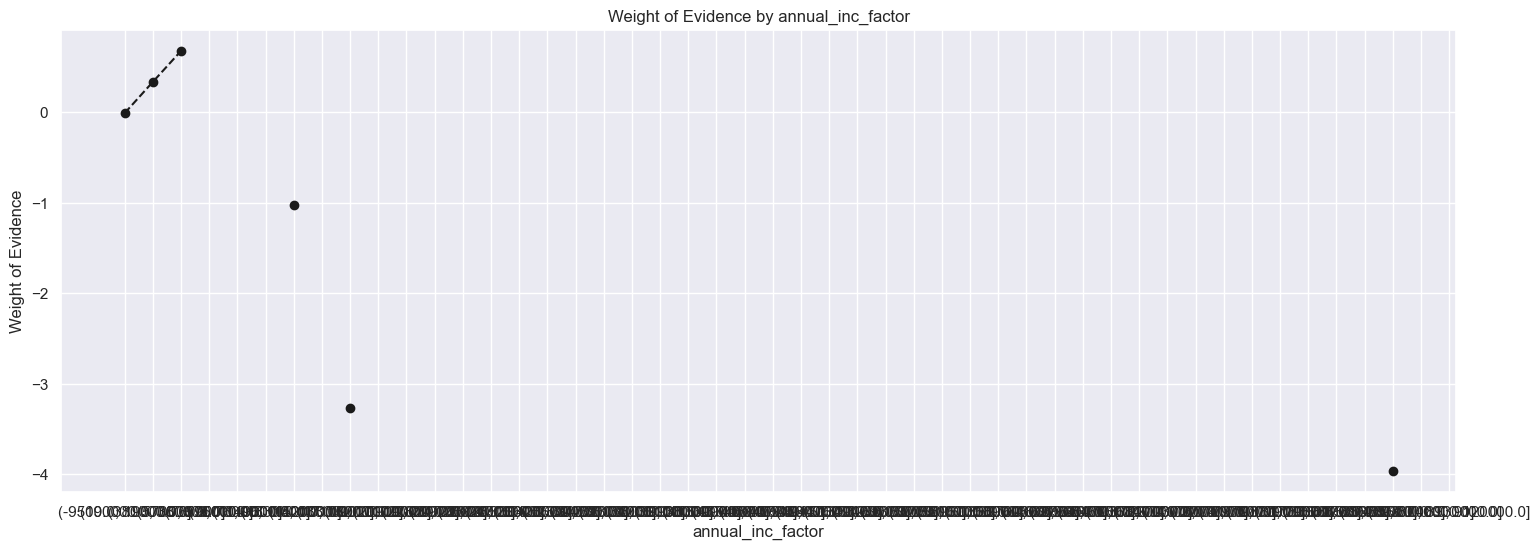

In [301]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50);
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr);
plot_by_woe(df_temp);

In [303]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100);
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr);
df_temp;

C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)


In [305]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ];

C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\3598728330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50);
C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True

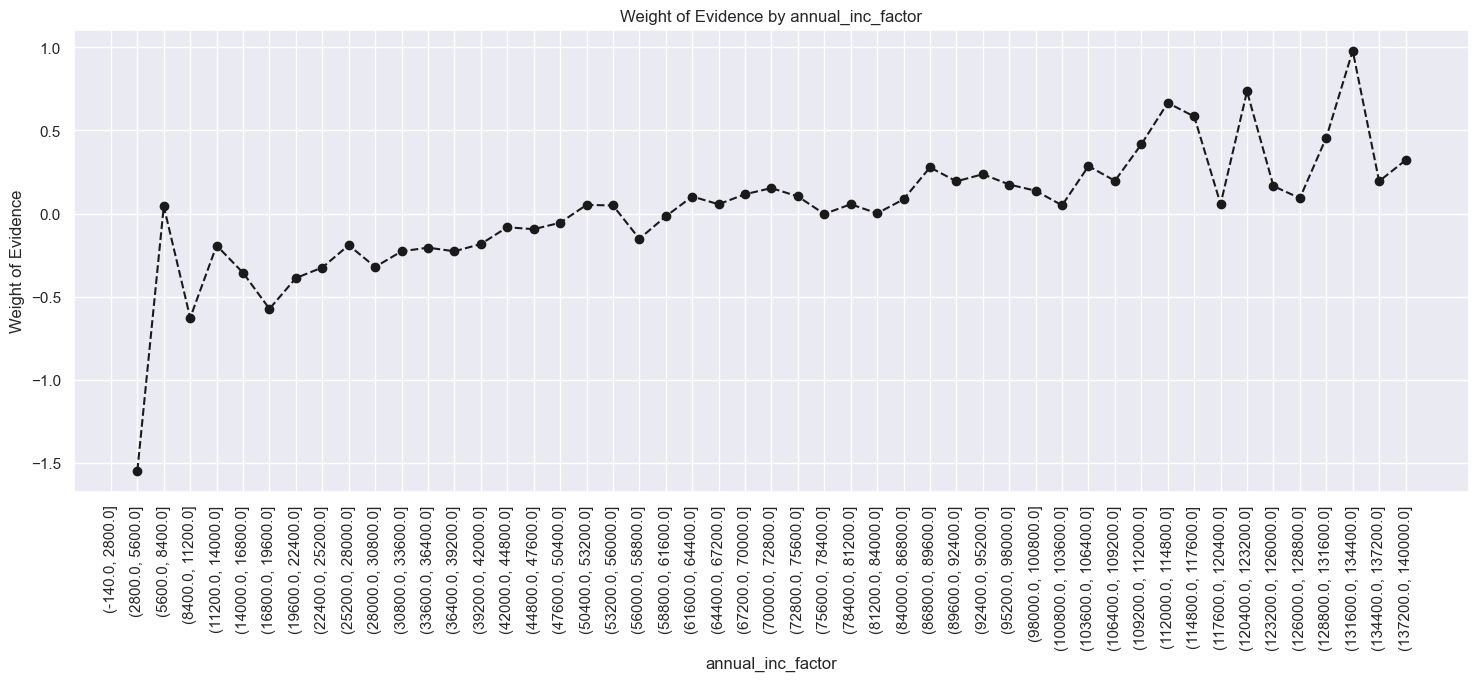

In [306]:
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50);
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index]);
# We calculate weight of evidence.
plot_by_woe(df_temp, 90);

In [308]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0);
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0);
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0);
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0);
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0);
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0);
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0);
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0);
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0);
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0);
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0);
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0);

C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\400864234.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50);
C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:4: FutureWarning: The default of observed=False is deprecated and 

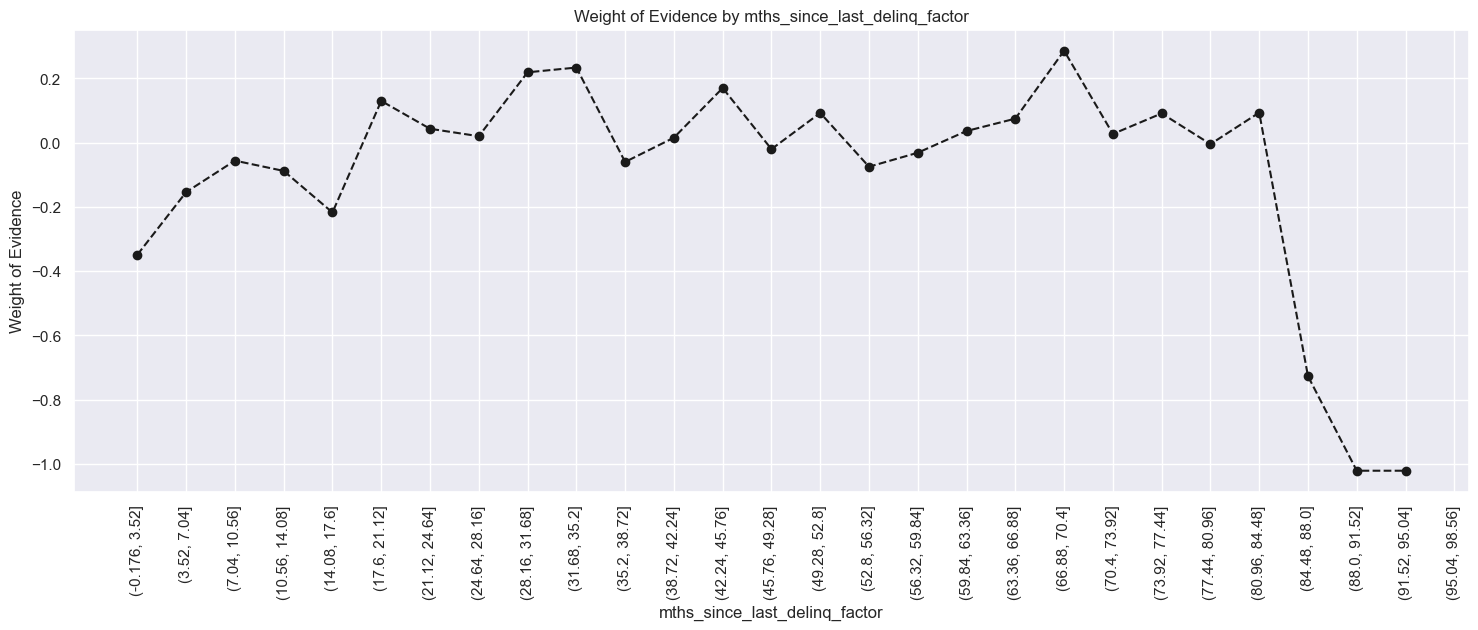

In [309]:
# mths_since_last_delinq
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])];
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50);
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index]);
# We calculate weight of evidence.
plot_by_woe(df_temp, 90);

In [310]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0);
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0);
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0);
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0);
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0);

In [311]:
# dti
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100);
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr);
# We calculate weight of evidence.
df_temp;

C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)


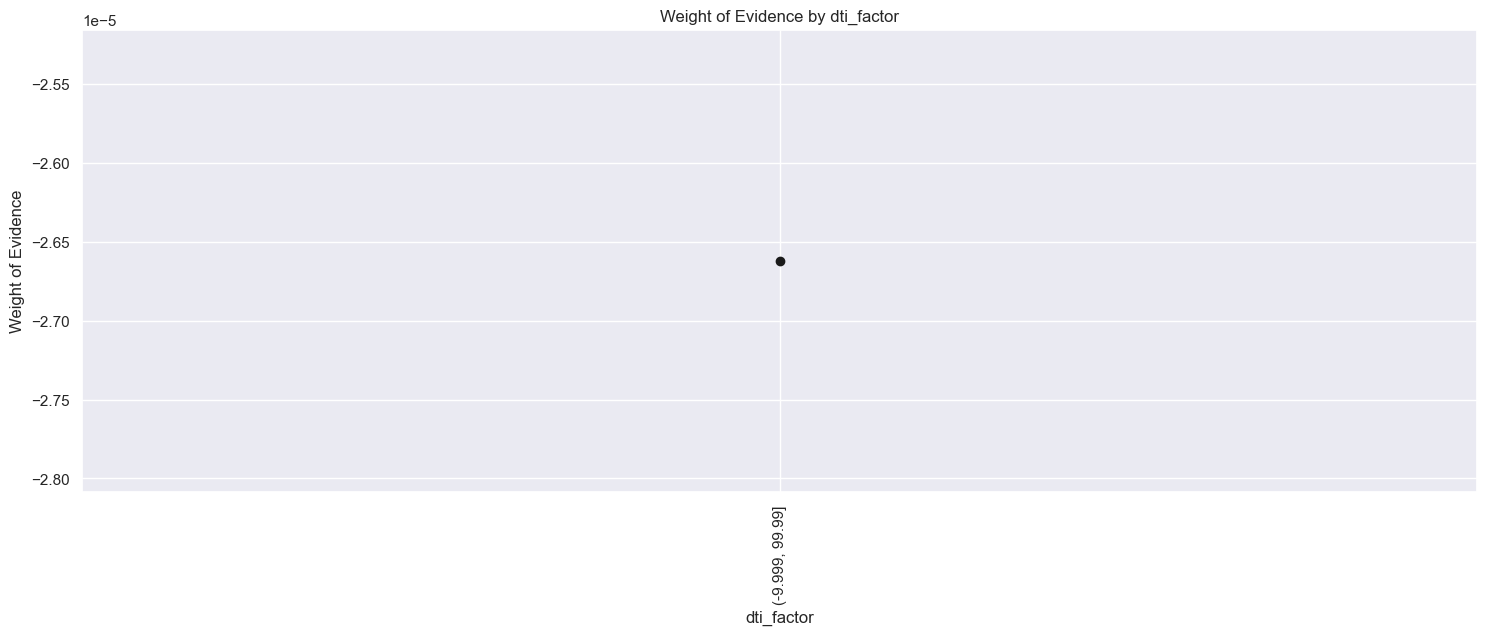

In [314]:
plot_by_woe(df_temp, 90)


C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\3243263128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50);
C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future v

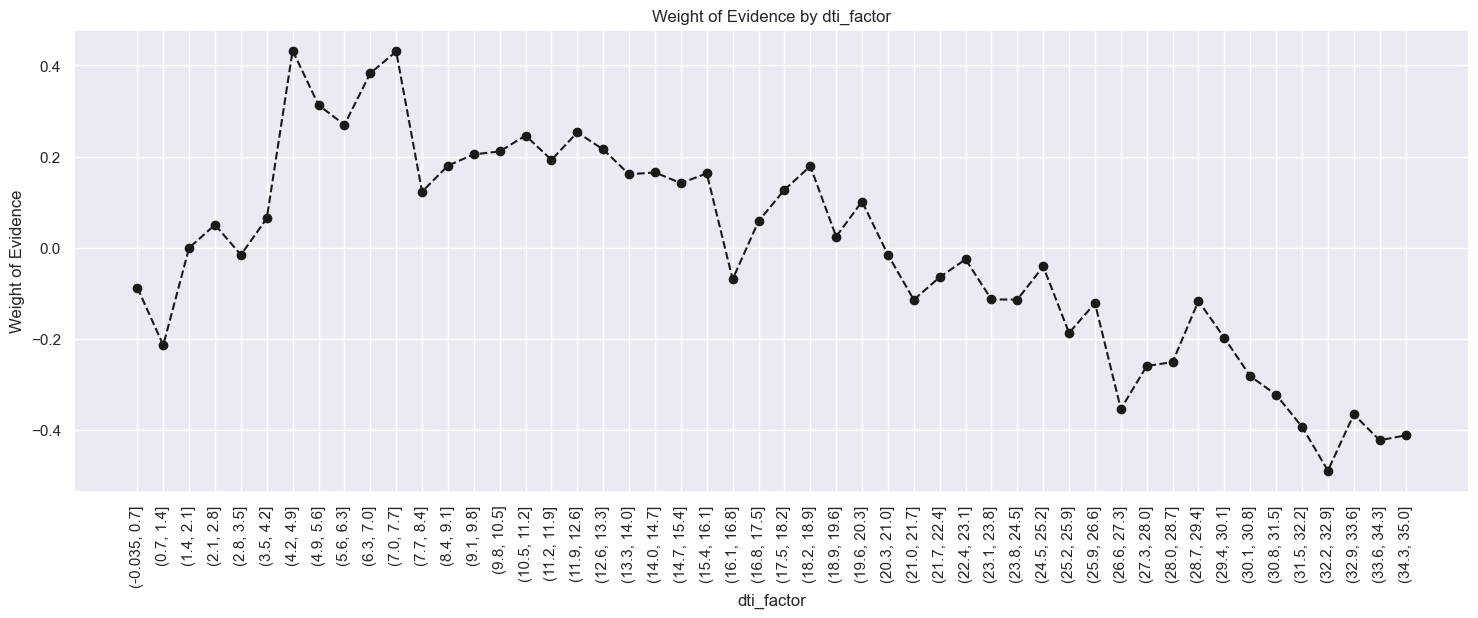

In [319]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ];
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50);
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index]);
# We calculate weight of evidence.
plot_by_woe(df_temp, 90);

In [321]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0);
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0);
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0);
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0);
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0);
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0);
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0);
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0);
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0);
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0);

C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\1362093086.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0);
C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\1362093086.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0);
C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\1362093086.py:6: Performan

In [323]:
# dti
df_inputs_prepr['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr['mths_since_last_record'], 100);
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_last_record_factor', df_targets_prepr);
# We calculate weight of evidence.
df_temp;

C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\474669660.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr['mths_since_last_record'], 100);
C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to T

C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\4186302536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50);
C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\169365751.py:4: FutureWarning: The default of observed=False is deprecated and

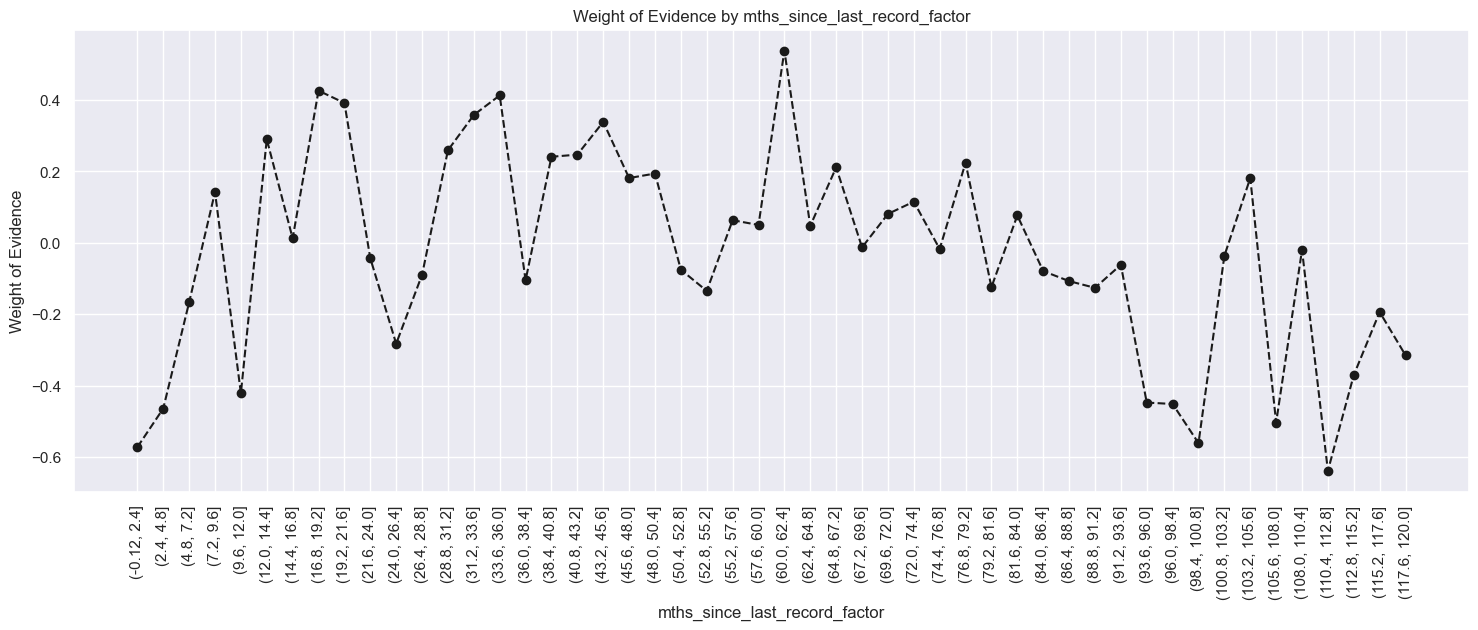

In [325]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])];
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50);
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index]);
# We calculate weight of evidence.
plot_by_woe(df_temp, 90);

In [326]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0);
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0);
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0);
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0);
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0);
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0);
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0);

C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\3670449120.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0);
C:\Users\fatem\AppData\Local\Temp\ipykernel_12560\3670449120.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0);
C:\Users\fatem\AppDat

In [327]:
#loan_data_inputs_train= df_inputs_prepr
#loan_data_inputs_test = df_inputs_prepr
loan_data_inputs_2015 = df_inputs_prepr
loan_data_targets_2015 = df_targets_prepr

In [328]:
loan_data_inputs_2015.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [333]:
loan_data_inputs_2015.shape

(421094, 322)

In [335]:
loan_data_targets_2015.shape

(421094,)

In [337]:
#loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
#loan_data_targets_train.to_csv('loan_data_targets_train.csv')
#loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
#loan_data_targets_test.to_csv('loan_data_targets_test.csv')

In [339]:
loan_data_inputs_2015.to_csv('loan_data_inputs_2015.csv')
loan_data_targets_2015.to_csv('loan_data_targets_2015.csv')

In [341]:
inputs_train_with_ref_cat = pd.read_csv('inputs_train_with_ref_cat.csv', index_col = 0)
# We import the dataset with old data, i.e. "expected" data.

In [343]:
# From the dataframe with new, "actual" data, we keep only the relevant columns.
inputs_2015_with_ref_cat= loan_data_inputs_2015.loc[:, ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_NV_FL_HI_AL',
'addr_state:NM_VA_OK_TN',
'addr_state:LA_NC',
'addr_state:NY',
'addr_state:CA',
'addr_state:TX',                                                            
'addr_state:MO_MD_UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR_WI',
'addr_state:IL_CT_MT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID_IA',                                                            
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:sm_b___mov__house',
'purpose:oth__educ_ren_en__med',
'purpose:wedd__vacation',
'purpose:major_purch__car__home_impr',
'purpose:credit_card',
'purpose:debt_consolidation',                                                            
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length_int:0',
'emp_length_int:1',
'emp_length_int:2-4',
'emp_length_int:5-6',
'emp_length_int:7-9',
'emp_length_int:10',                                                            
'mths_since_issue_d:<38',
'mths_since_issue_d: 38-39',
'mths_since_issue_d: 40-41',
'mths_since_issue_d: 42-48',
'mths_since_issue_d: 49-52',
'mths_since_issue_d: 53-64',
'mths_since_issue_d: 65-86',
'mths_since_issue_d:>86',
'int_rate: <9.548',
'int_rate: 9.548- 12.025',
'int_rate: 12.025- 15.74',
'int_rate: 15.74- 20.281',
'int_rate: > 20.281',
'mths_since_earliest_cr_line: < 140',
'mths_since_earliest_cr_line: 141-164',
'mths_since_earliest_cr_line: 165-247',
'mths_since_earliest_cr_line: 248-270',
'mths_since_earliest_cr_line: 271-352',
'mths_since_earliest_cr_line: > 352',
'inq_last_6mths: =0',
'inq_last_6mths: 1-2',
'inq_last_6mths: 3-6',
'inq_last_6mths: > 6',
'acc_now_delinq:0-1',
'acc_now_delinq:>= 2',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35'
]];

In [345]:
inputs_2015_with_ref_cat.shape

(421094, 89)

In [347]:
inputs_train_with_ref_cat.shape

(373028, 89)

In [349]:
df_scorecard = pd.read_csv('df_scorecard.csv', index_col = 0)
# We import the scorecard.

In [351]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,0.333259,NaN,Intercept,383.337030,383.0,-0.337030,383.0
1,1,grade:A,0.762682,3.799520e-17,grade,70.534014,71.0,0.465986,71.0
2,2,grade:B,0.518638,2.522503e-17,grade,47.964409,48.0,0.035591,48.0
3,3,grade:C,0.344070,1.297839e-09,grade,31.820164,32.0,0.179836,32.0
4,4,grade:D,0.188629,4.353329e-04,grade,17.444684,17.0,-0.444684,18.0
5,5,grade:E,0.096803,3.944642e-02,grade,8.952447,9.0,0.047553,9.0
6,6,grade:F,-0.065726,1.789959e-01,grade,-6.078417,-6.0,0.078417,-6.0
7,7,home_ownership:OWN,0.083309,3.671561e-05,home_ownership,7.704555,8.0,0.295445,8.0
8,8,home_ownership:MORTGAGE,0.112954,5.350183e-19,home_ownership,10.446137,10.0,-0.446137,11.0
9,9,addr_state:NM_VA_OK_TN,0.025434,3.493989e-01,addr_state,2.352160,2.0,-0.352160,2.0


In [353]:
inputs_train_with_ref_cat_w_intercept= inputs_train_with_ref_cat
inputs_train_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
inputs_train_with_ref_cat_w_intercept= inputs_train_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
inputs_train_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA_OK_TN,addr_state:LA_NC,addr_state:NY,addr_state:CA,addr_state:TX,addr_state:MO_MD_UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR_WI,addr_state:IL_CT_MT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID_IA,verification_status:Not Verified,verification_status:Source Verified,purpose:oth__educ_ren_en__med,purpose:wedd__vacation,purpose:major_purch__car__home_impr,purpose:credit_card,purpose:debt_consolidation,initial_list_status:w,term:36,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,mths_since_issue_d:<38,mths_since_issue_d: 38-39,mths_since_issue_d: 40-41,mths_since_issue_d: 42-48,mths_since_issue_d: 49-52,mths_since_issue_d: 53-64,mths_since_issue_d: 65-86,int_rate: <9.548,int_rate: 9.548- 12.025,int_rate: 12.025- 15.74,int_rate: 15.74- 20.281,mths_since_earliest_cr_line: 141-164,mths_since_earliest_cr_line: 165-247,mths_since_earliest_cr_line: 248-270,mths_since_earliest_cr_line: 271-352,mths_since_earliest_cr_line: > 352,inq_last_6mths: =0,inq_last_6mths: 1-2,inq_last_6mths: 3-6,acc_now_delinq:>= 2,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_NV_FL_HI_AL,verification_status:Verified,purpose:sm_b___mov__house,initial_list_status:f,term:60,emp_length_int:0,mths_since_issue_d:>86,int_rate: > 20.281,mths_since_earliest_cr_line: < 140,inq_last_6mths: > 6,acc_now_delinq:0-1,annual_inc:<20K,dti:>35
427211,1,True,False,False,False,False,False,False,True,0,0,False,False,False,0,0,0,0,0,1,0,False,True,0,0,0,False,True,False,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,False,0,0,False,0,True,0,0,0,0,0,0,1,0,0
206088,1,False,False,True,False,False,False,False,True,0,0,False,False,False,1,0,0,0,0,0,0,True,False,0,0,0,False,True,False,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,False,0,0,False,0,True,0,0,0,0,0,0,1,0,0
136020,1,True,False,False,False,False,False,False,True,0,0,False,False,False,0,0,0,1,0,0,0,False,False,0,0,0,False,True,False,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,False,0,0,True,0,True,0,0,0,0,0,0,1,0,0
412305,1,False,False,False,True,False,False,False,False,0,0,False,False,False,0,0,1,0,0,0,0,False,True,0,0,0,False,True,False,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,False,1,0,False,0,True,0,0,0,0,0,0,1,0,0
36159,1,False,False,True,False,False,False,False,True,0,0,False,True,False,0,0,0,0,0,0,0,False,False,1,0,0,False,False,False,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,False,0,0,True,0,True,0,0,1,0,0,0,1,0,0


In [355]:
inputs_2015_with_ref_cat_w_intercept = inputs_2015_with_ref_cat
inputs_2015_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
inputs_2015_with_ref_cat_w_intercept= inputs_2015_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
inputs_2015_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA_OK_TN,addr_state:LA_NC,addr_state:NY,addr_state:CA,addr_state:TX,addr_state:MO_MD_UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR_WI,addr_state:IL_CT_MT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID_IA,verification_status:Not Verified,verification_status:Source Verified,purpose:oth__educ_ren_en__med,purpose:wedd__vacation,purpose:major_purch__car__home_impr,purpose:credit_card,purpose:debt_consolidation,initial_list_status:w,term:36,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,mths_since_issue_d:<38,mths_since_issue_d: 38-39,mths_since_issue_d: 40-41,mths_since_issue_d: 42-48,mths_since_issue_d: 49-52,mths_since_issue_d: 53-64,mths_since_issue_d: 65-86,int_rate: <9.548,int_rate: 9.548- 12.025,int_rate: 12.025- 15.74,int_rate: 15.74- 20.281,mths_since_earliest_cr_line: 141-164,mths_since_earliest_cr_line: 165-247,mths_since_earliest_cr_line: 248-270,mths_since_earliest_cr_line: 271-352,mths_since_earliest_cr_line: > 352,inq_last_6mths: =0,inq_last_6mths: 1-2,inq_last_6mths: 3-6,acc_now_delinq:>= 2,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_NV_FL_HI_AL,verification_status:Verified,purpose:sm_b___mov__house,initial_list_status:f,term:60,emp_length_int:0,mths_since_issue_d:>86,int_rate: > 20.281,mths_since_earliest_cr_line: < 140,inq_last_6mths: > 6,acc_now_delinq:0-1,annual_inc:<20K,dti:>35
0,1,False,False,True,False,False,False,False,True,0,0,False,False,False,0,0,0,0,0,0,1,False,True,0,0,1,False,False,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,False,0,0,False,0,False,1,0,0,0,0,0,1,0,0
1,1,True,False,False,False,False,False,False,True,0,0,False,False,False,0,0,1,0,0,0,0,True,False,0,0,0,True,False,True,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,False,0,0,False,0,False,0,1,0,0,0,0,1,0,0
2,1,False,False,True,False,False,False,False,False,0,0,False,False,False,0,0,0,0,0,1,0,False,True,0,0,0,False,True,True,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,False,1,0,False,0,False,0,0,0,0,1,0,1,0,0
3,1,False,False,True,False,False,False,False,False,0,0,False,False,False,0,0,1,0,0,0,0,True,False,0,0,0,False,True,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,1,0,False,0,False,1,0,0,0,0,0,1,0,0
4,1,False,True,False,False,False,False,False,True,0,0,False,False,False,0,0,0,0,1,0,0,True,False,0,0,1,False,False,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,False,0,0,False,0,False,1,0,0,0,0,0,1,0,0


In [357]:
scorecard_scores = df_scorecard['Score - Final']
scorecard_scores = scorecard_scores.values.reshape(90, 1)

In [359]:
y_scores_train = inputs_train_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.
y_scores_train.head()

,0
427211,674.0
206088,565.0
136020,650.0
412305,487.0
36159,531.0


In [360]:
y_scores_2015 = inputs_2015_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.
y_scores_2015.head()

,0
0,743.0
1,752.0
2,606.0
3,596.0
4,687.0


In [362]:
inputs_train_with_ref_cat_w_intercept= pd.concat([inputs_train_with_ref_cat_w_intercept, y_scores_train], axis= 1)
inputs_2015_with_ref_cat_w_intercept= pd.concat([inputs_2015_with_ref_cat_w_intercept, y_scores_2015], axis= 1)

In [365]:
inputs_train_with_ref_cat_w_intercept.columns.values[inputs_train_with_ref_cat_w_intercept.shape[1] - 1] = 'Score'
inputs_2015_with_ref_cat_w_intercept.columns.values[inputs_2015_with_ref_cat_w_intercept.shape[1] - 1] = 'Score'
# Here we rename the columns containing scores to "Score" in both dataframes.

In [367]:
inputs_2015_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA_OK_TN,addr_state:LA_NC,addr_state:NY,addr_state:CA,addr_state:TX,addr_state:MO_MD_UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR_WI,addr_state:IL_CT_MT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID_IA,verification_status:Not Verified,verification_status:Source Verified,purpose:oth__educ_ren_en__med,purpose:wedd__vacation,purpose:major_purch__car__home_impr,purpose:credit_card,purpose:debt_consolidation,initial_list_status:w,term:36,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,mths_since_issue_d:<38,mths_since_issue_d: 38-39,mths_since_issue_d: 40-41,mths_since_issue_d: 42-48,mths_since_issue_d: 49-52,mths_since_issue_d: 53-64,mths_since_issue_d: 65-86,int_rate: <9.548,int_rate: 9.548- 12.025,int_rate: 12.025- 15.74,int_rate: 15.74- 20.281,mths_since_earliest_cr_line: 141-164,mths_since_earliest_cr_line: 165-247,mths_since_earliest_cr_line: 248-270,mths_since_earliest_cr_line: 271-352,mths_since_earliest_cr_line: > 352,inq_last_6mths: =0,inq_last_6mths: 1-2,inq_last_6mths: 3-6,acc_now_delinq:>= 2,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_NV_FL_HI_AL,verification_status:Verified,purpose:sm_b___mov__house,initial_list_status:f,term:60,emp_length_int:0,mths_since_issue_d:>86,int_rate: > 20.281,mths_since_earliest_cr_line: < 140,inq_last_6mths: > 6,acc_now_delinq:0-1,annual_inc:<20K,dti:>35,Score
0,1,False,False,True,False,False,False,False,True,0,0,False,False,False,0,0,0,0,0,0,1,False,True,0,0,1,False,False,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,False,0,0,False,0,False,1,0,0,0,0,0,1,0,0,743.0
1,1,True,False,False,False,False,False,False,True,0,0,False,False,False,0,0,1,0,0,0,0,True,False,0,0,0,True,False,True,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,False,0,0,False,0,False,0,1,0,0,0,0,1,0,0,752.0
2,1,False,False,True,False,False,False,False,False,0,0,False,False,False,0,0,0,0,0,1,0,False,True,0,0,0,False,True,True,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,False,1,0,False,0,False,0,0,0,0,1,0,1,0,0,606.0
3,1,False,False,True,False,False,False,False,False,0,0,False,False,False,0,0,1,0,0,0,0,True,False,0,0,0,False,True,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,1,0,False,0,False,1,0,0,0,0,0,1,0,0,596.0
4,1,False,True,False,False,False,False,False,True,0,0,False,False,False,0,0,0,0,1,0,0,True,False,0,0,1,False,False,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,False,0,0,False,0,False,1,0,0,0,0,0,1,0,0,687.0


In [369]:
inputs_train_with_ref_cat_w_intercept['Score:300-350'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 300) & (inputs_train_with_ref_cat_w_intercept['Score'] < 350), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:350-400'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 350) & (inputs_train_with_ref_cat_w_intercept['Score'] < 400), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:400-450'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 400) & (inputs_train_with_ref_cat_w_intercept['Score'] < 450), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:450-500'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 450) & (inputs_train_with_ref_cat_w_intercept['Score'] < 500), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:500-550'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 500) & (inputs_train_with_ref_cat_w_intercept['Score'] < 550), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:550-600'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 550) & (inputs_train_with_ref_cat_w_intercept['Score'] < 600), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:600-650'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 600) & (inputs_train_with_ref_cat_w_intercept['Score'] < 650), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:650-700'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 650) & (inputs_train_with_ref_cat_w_intercept['Score'] < 700), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:700-750'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 700) & (inputs_train_with_ref_cat_w_intercept['Score'] < 750), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:750-800'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 750) & (inputs_train_with_ref_cat_w_intercept['Score'] < 800), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:800-850'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 800) & (inputs_train_with_ref_cat_w_intercept['Score'] <= 850), 1, 0)
# We create dummy variables for score intervals in the dataframe with old ("expected").

In [370]:
inputs_2015_with_ref_cat_w_intercept['Score:300-350'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 300) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 350), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:350-400'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 350) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 400), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:400-450'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 400) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 450), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:450-500'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 450) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 500), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:500-550'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 500) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 550), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:550-600'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 550) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 600), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:600-650'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 600) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 650), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:650-700'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 650) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 700), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:700-750'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 700) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 750), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:750-800'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 750) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 800), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:800-850'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 800) & (inputs_2015_with_ref_cat_w_intercept['Score'] <= 850), 1, 0)
# We create dummy variables for score intervals in the dataframe with new ("actual").

In [372]:
PSI_calc_train = inputs_train_with_ref_cat_w_intercept.sum() / inputs_train_with_ref_cat_w_intercept.shape[0]
# We create a dataframe with proportions of observations for each dummy variable for the old ("expected") data.
PSI_calc_train;

In [375]:
PSI_calc_2015 = inputs_2015_with_ref_cat_w_intercept.sum() / inputs_2015_with_ref_cat_w_intercept.shape[0]
# We create a dataframe with proportions of observations for each dummy variable for the new ("actual") data.
PSI_calc_2015;

In [377]:
PSI_calc= pd.concat([PSI_calc_train, PSI_calc_2015], axis=1)

In [379]:
PSI_calc = PSI_calc.reset_index()
# We reset the index of the dataframe. The index becomes from 0 to the total number of rows less one.
# The old index, which is the dummy variable name, becomes a column, named 'index'.

In [381]:
import re

PSI_calc['Original feature name'] = PSI_calc['index'].apply(
    lambda x: re.split('[:><=]', x)[0] if isinstance(x, str) else x
)
# up to the column symbol.
#PSI_calc.columns = ['index', 'Proportions_Train', 'Proportions_New', 'Original feature name']
# We change the names of the columns of the dataframe.

In [383]:
PSI_calc.columns = ['index', 'Proportions_Train', 'Proportions_New', 'Original feature name']
# We change the names of the columns of the dataframe.

In [385]:
PSI_calc = PSI_calc[np.array(['index', 'Original feature name', 'Proportions_Train', 'Proportions_New'])]

In [387]:
PSI_calc= PSI_calc[(PSI_calc['index'] != 'Intercept') & (PSI_calc['index'] != 'Score')]
# We remove the rows with values in the 'index' column 'Intercept' and 'Score'.

In [389]:
PSI_calc['Proportions_New'] = pd.to_numeric(PSI_calc['Proportions_New'], errors='coerce')
PSI_calc['Proportions_Train'] = pd.to_numeric(PSI_calc['Proportions_Train'], errors='coerce')

In [391]:
PSI_calc['Contribution'] = np.where((PSI_calc['Proportions_Train'] == 0) | (PSI_calc['Proportions_New'] == 0), 0, (PSI_calc['Proportions_New'] - PSI_calc['Proportions_Train']) * np.log(PSI_calc['Proportions_New'] / PSI_calc['Proportions_Train']))
# We calculate the contribution of each dummy variable to the PSI of each original variable it comes from.
# If either the proportion of old data or the proportion of new data are 0, the contribution is 0.
# Otherwise, we apply the PSI formula for each contribution.

C:\Users\fatem\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [393]:
PSI_calc

,index,Original feature name,Proportions_Train,Proportions_New,Contribution
1,grade:A,grade,0.160200,0.174154,1.165355e-03
2,grade:B,grade,0.294160,0.279287,7.717123e-04
3,grade:C,grade,0.268733,0.286318,1.114660e-03
4,grade:D,grade,0.164862,0.148789,1.648763e-03
5,grade:E,grade,0.076702,0.082993,4.959607e-04
6,grade:F,grade,0.028228,0.023313,9.403837e-04
7,home_ownership:OWN,home_ownership,0.089256,0.108684,3.825896e-03
8,home_ownership:MORTGAGE,home_ownership,0.506546,0.493196,3.565650e-04
9,addr_state:NM_VA_OK_TN,addr_state,0.057824,0.059975,7.853782e-05
10,addr_state:LA_NC,addr_state,0.039040,0.040694,6.863401e-05


In [395]:
PSI_calc.groupby('Original feature name')['Contribution'].sum()
# Finally, we sum all contributions for each original independent variable and the 'Score' variable.

Original feature name
Score                          1.018249
acc_now_delinq                 0.000042
addr_state                     0.003480
annual_inc                     0.005445
dti                            0.078143
emp_length_int                 0.007619
grade                          0.006775
home_ownership                 0.004275
initial_list_status            0.333717
inq_last_6mths                 0.060786
int_rate                       0.079230
mths_since_earliest_cr_line    0.033566
mths_since_issue_d             2.388305
purpose                        0.009637
term                           0.013099
verification_status            0.048219
Name: Contribution, dtype: float64